In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


In [13]:
# Load the benchmark data
df = pd.read_csv('benchmark_results.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nUnique test graphs:")
for graph in df['Graph'].unique():
    print(f"  - {graph}")
print("\nUnique algorithms:")
for alg in df['Algorithm'].unique():
    print(f"  - {alg}")
print("\nThread counts tested:", sorted(df['Threads'].unique()))
print("\nDelta values tested:", sorted(df['Delta'].unique()))


Dataset shape: (1510, 15)

Columns: ['Graph', 'Algorithm', 'Configuration', 'Vertices', 'Edges', 'Source', 'Delta', 'Threads', 'Min_Time_ms', 'Avg_Time_ms', 'Max_Time_ms', 'Num_Runs', 'Speedup', 'Efficiency', 'Correct']

Unique test graphs:
  - assets/test_cases/lrd_1e6_1e8_powerlaw
  - assets/test_cases/lrd_1e6_1e8_uniform
  - assets/test_cases/lrs_2e6_6e6_powerlaw
  - assets/test_cases/lrs_2e6_6e6_uniform
  - assets/test_cases/lu_500k_5e6_powerlaw
  - assets/test_cases/lu_500k_5e6_uniform
  - assets/test_cases/rmat_1e6_5e6_powerlaw
  - assets/test_cases/rmat_1e6_5e6_uniform
  - assets/test_cases/rmat_2e6_10e6_powerlaw
  - assets/test_cases/rmat_2e6_10e6_uniform

Unique algorithms:
  - Dijkstra algorithm
  - Optimized parallel delta stepping
  - Parallel delta stepping with optimized load balancing
  - Parallel delta stepping with optimized load balancing - parallel prefix sums

Thread counts tested: [1, 2, 4, 8, 10, 16]

Delta values tested: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0

In [14]:
# Data preprocessing
# Extract graph name from full path for cleaner visualization
df['Graph_Name'] = df['Graph'].apply(lambda x: Path(x).name if pd.notna(x) else x)

# Create simplified algorithm names for better readability
algorithm_mapping = {
    'Dijkstra algorithm': 'Dijkstra',
    'Optimized parallel delta stepping': 'Optimized Parallel ΔS',
    'Parallel delta stepping with optimized load balancing': 'Load Balanced ΔS',
    'Parallel delta stepping with optimized load balancing - parallel prefix sums': 'Load Balanced ΔS + Prefix'
}

df['Algorithm_Short'] = df['Algorithm'].map(algorithm_mapping)

# Display first few rows to verify
print("Sample of processed data:")
df[['Graph_Name', 'Algorithm_Short', 'Delta', 'Threads', 'Min_Time_ms']].head(10)


Sample of processed data:


,Graph_Name,Algorithm_Short,Delta,Threads,Min_Time_ms
0,lrd_1e6_1e8_powerlaw,Dijkstra,0.0,1,1353
1,lrd_1e6_1e8_powerlaw,Optimized Parallel ΔS,0.0,2,2089
2,lrd_1e6_1e8_powerlaw,Load Balanced ΔS,0.0,2,1499
3,lrd_1e6_1e8_powerlaw,Load Balanced ΔS + Prefix,0.0,2,1496
4,lrd_1e6_1e8_powerlaw,Optimized Parallel ΔS,0.0,4,1463
5,lrd_1e6_1e8_powerlaw,Load Balanced ΔS,0.0,4,821
6,lrd_1e6_1e8_powerlaw,Load Balanced ΔS + Prefix,0.0,4,871
7,lrd_1e6_1e8_powerlaw,Optimized Parallel ΔS,0.0,8,1256
8,lrd_1e6_1e8_powerlaw,Load Balanced ΔS,0.0,8,564
9,lrd_1e6_1e8_powerlaw,Load Balanced ΔS + Prefix,0.0,8,611


In [15]:
# For each graph and algorithm combination, find the minimum runtime across all configurations
min_runtime_per_algorithm = df.groupby(['Graph_Name', 'Algorithm_Short'])['Min_Time_ms'].min().reset_index()

print("Minimum runtimes per algorithm for each graph:")
print(min_runtime_per_algorithm.pivot(index='Graph_Name', columns='Algorithm_Short', values='Min_Time_ms'))


Minimum runtimes per algorithm for each graph:
Algorithm_Short         Dijkstra  Load Balanced ΔS  Load Balanced ΔS + Prefix  \
Graph_Name                                                                      
lrd_1e6_1e8_powerlaw        1353               402                        458   
lrd_1e6_1e8_uniform         1618               362                        400   
lrs_2e6_6e6_powerlaw         997               974                       1127   
lrs_2e6_6e6_uniform          772               203                        229   
lu_500k_5e6_powerlaw         248               197                        238   
lu_500k_5e6_uniform          248                82                         93   
rmat_1e6_5e6_powerlaw        403               141                        173   
rmat_1e6_5e6_uniform         430               123                        147   
rmat_2e6_10e6_powerlaw      1020               280                        339   
rmat_2e6_10e6_uniform       1051               234            

<Figure size 1400x800 with 0 Axes>

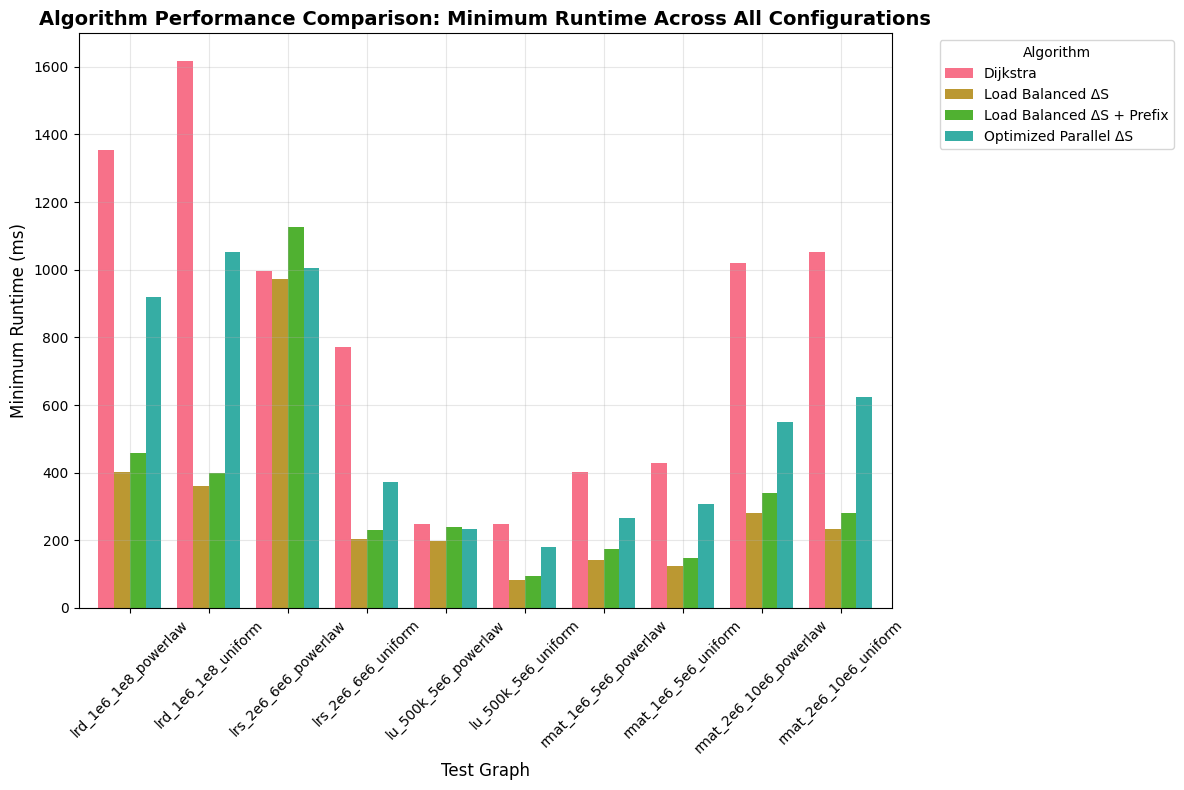

<Figure size 1400x800 with 0 Axes>

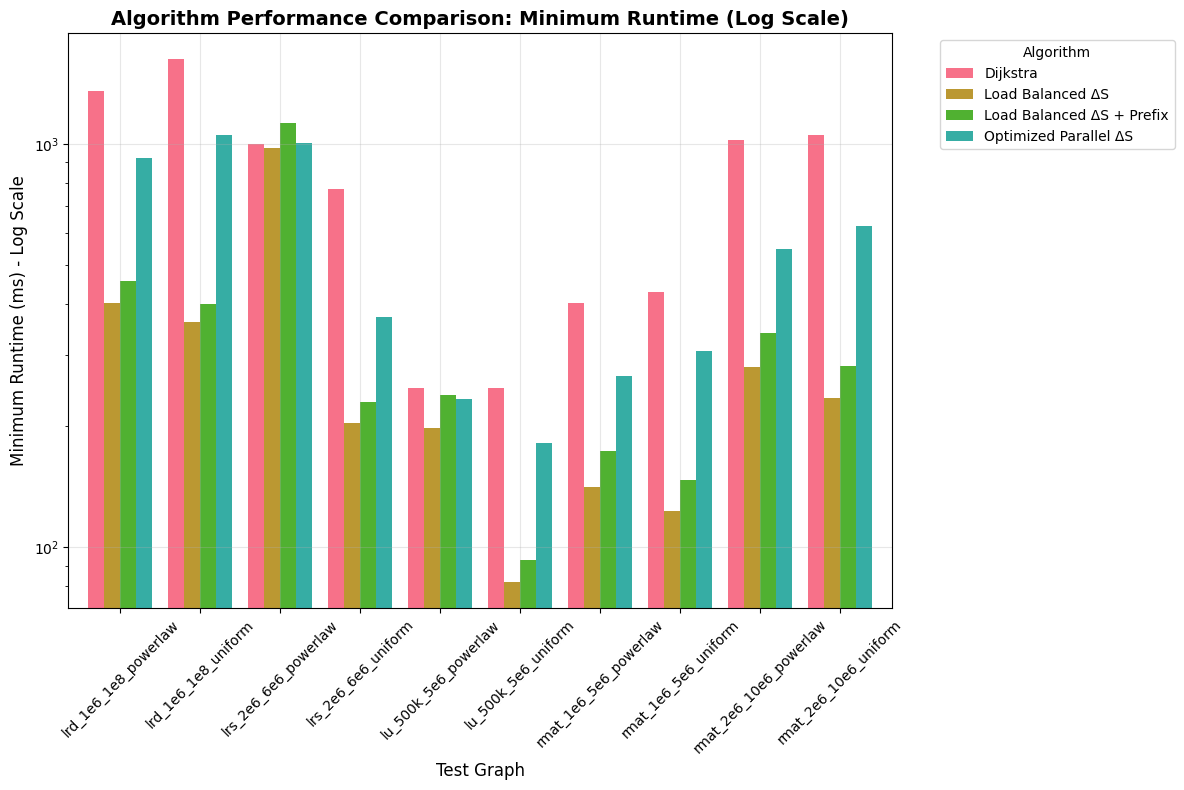

In [16]:
# Create comparison visualization - Plot 1: Linear Scale
plt.figure(figsize=(14, 8))
pivot_data = min_runtime_per_algorithm.pivot(index='Graph_Name', columns='Algorithm_Short', values='Min_Time_ms')
pivot_data.plot(kind='bar', width=0.8)
plt.title('Algorithm Performance Comparison: Minimum Runtime Across All Configurations', fontsize=14, fontweight='bold')
plt.xlabel('Test Graph', fontsize=12)
plt.ylabel('Minimum Runtime (ms)', fontsize=12)
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Log Scale version for better comparison
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', width=0.8, logy=True)
plt.title('Algorithm Performance Comparison: Minimum Runtime (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Test Graph', fontsize=12)
plt.ylabel('Minimum Runtime (ms) - Log Scale', fontsize=12)
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

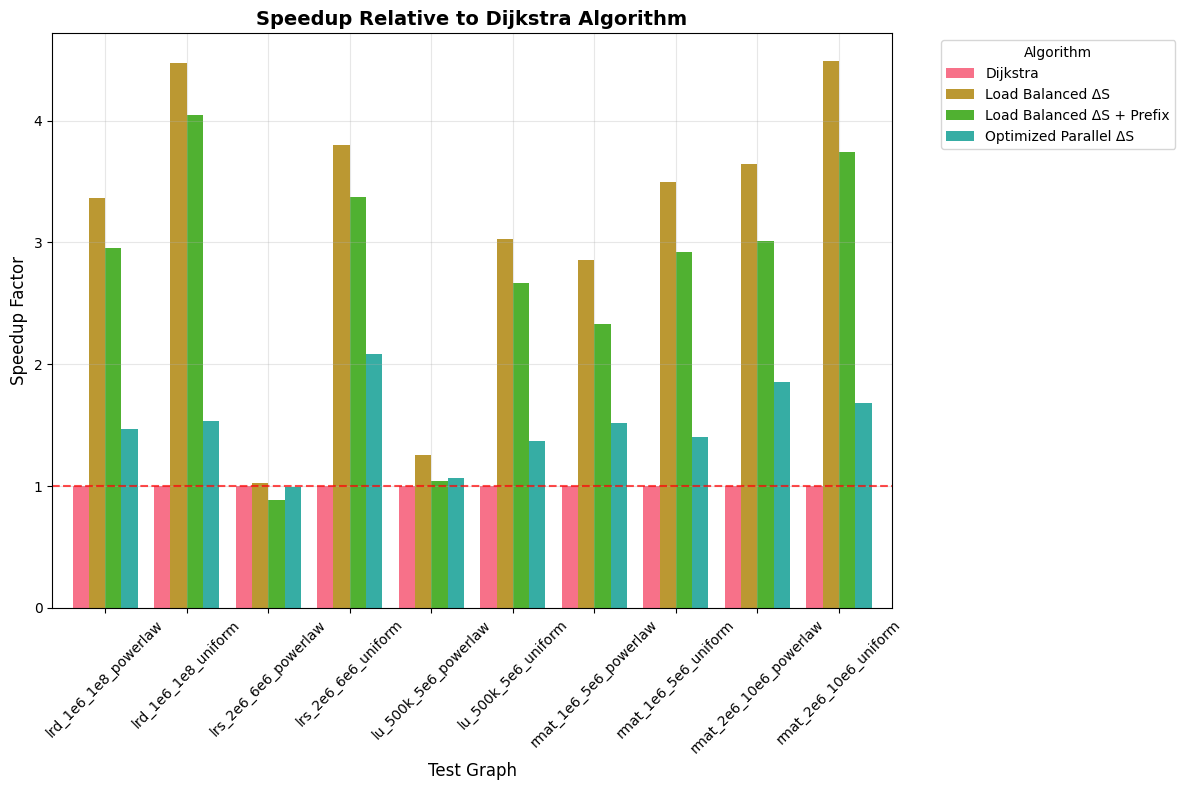


Speedup summary:
Algorithm_Short         Dijkstra  Load Balanced ΔS  Load Balanced ΔS + Prefix  \
Graph_Name                                                                      
lrd_1e6_1e8_powerlaw         1.0              3.37                       2.95   
lrd_1e6_1e8_uniform          1.0              4.47                       4.04   
lrs_2e6_6e6_powerlaw         1.0              1.02                       0.88   
lrs_2e6_6e6_uniform          1.0              3.80                       3.37   
lu_500k_5e6_powerlaw         1.0              1.26                       1.04   
lu_500k_5e6_uniform          1.0              3.02                       2.67   
rmat_1e6_5e6_powerlaw        1.0              2.86                       2.33   
rmat_1e6_5e6_uniform         1.0              3.50                       2.93   
rmat_2e6_10e6_powerlaw       1.0              3.64                       3.01   
rmat_2e6_10e6_uniform        1.0              4.49                       3.74   

Algorithm

In [17]:
# Calculate speedup relative to Dijkstra for each graph
speedup_data = []
for graph in min_runtime_per_algorithm['Graph_Name'].unique():
    graph_data = min_runtime_per_algorithm[min_runtime_per_algorithm['Graph_Name'] == graph]
    dijkstra_time = graph_data[graph_data['Algorithm_Short'] == 'Dijkstra']['Min_Time_ms'].iloc[0]
    
    for _, row in graph_data.iterrows():
        speedup = dijkstra_time / row['Min_Time_ms']
        speedup_data.append({
            'Graph_Name': graph,
            'Algorithm_Short': row['Algorithm_Short'],
            'Speedup': speedup
        })

speedup_df = pd.DataFrame(speedup_data)

# Plot speedup comparison
plt.figure(figsize=(14, 8))
speedup_pivot = speedup_df.pivot(index='Graph_Name', columns='Algorithm_Short', values='Speedup')
speedup_pivot.plot(kind='bar', width=0.8)
plt.title('Speedup Relative to Dijkstra Algorithm', fontsize=14, fontweight='bold')
plt.xlabel('Test Graph', fontsize=12)
plt.ylabel('Speedup Factor', fontsize=12)
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Baseline (Dijkstra)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSpeedup summary:")
print(speedup_pivot.round(2))


In [18]:
# Filter out Dijkstra (single-threaded) for thread analysis
parallel_df = df[df['Algorithm_Short'] != 'Dijkstra'].copy()

# For each graph, algorithm, and thread count, find minimum runtime across delta values
thread_analysis = parallel_df.groupby(['Graph_Name', 'Algorithm_Short', 'Threads'])['Min_Time_ms'].min().reset_index()

print("Sample of thread analysis data:")
print(thread_analysis.head(10))


Sample of thread analysis data:
             Graph_Name            Algorithm_Short  Threads  Min_Time_ms
0  lrd_1e6_1e8_powerlaw           Load Balanced ΔS        2         1499
1  lrd_1e6_1e8_powerlaw           Load Balanced ΔS        4          795
2  lrd_1e6_1e8_powerlaw           Load Balanced ΔS        8          544
3  lrd_1e6_1e8_powerlaw           Load Balanced ΔS       10          504
4  lrd_1e6_1e8_powerlaw           Load Balanced ΔS       16          402
5  lrd_1e6_1e8_powerlaw  Load Balanced ΔS + Prefix        2         1496
6  lrd_1e6_1e8_powerlaw  Load Balanced ΔS + Prefix        4          828
7  lrd_1e6_1e8_powerlaw  Load Balanced ΔS + Prefix        8          585
8  lrd_1e6_1e8_powerlaw  Load Balanced ΔS + Prefix       10          542
9  lrd_1e6_1e8_powerlaw  Load Balanced ΔS + Prefix       16          458


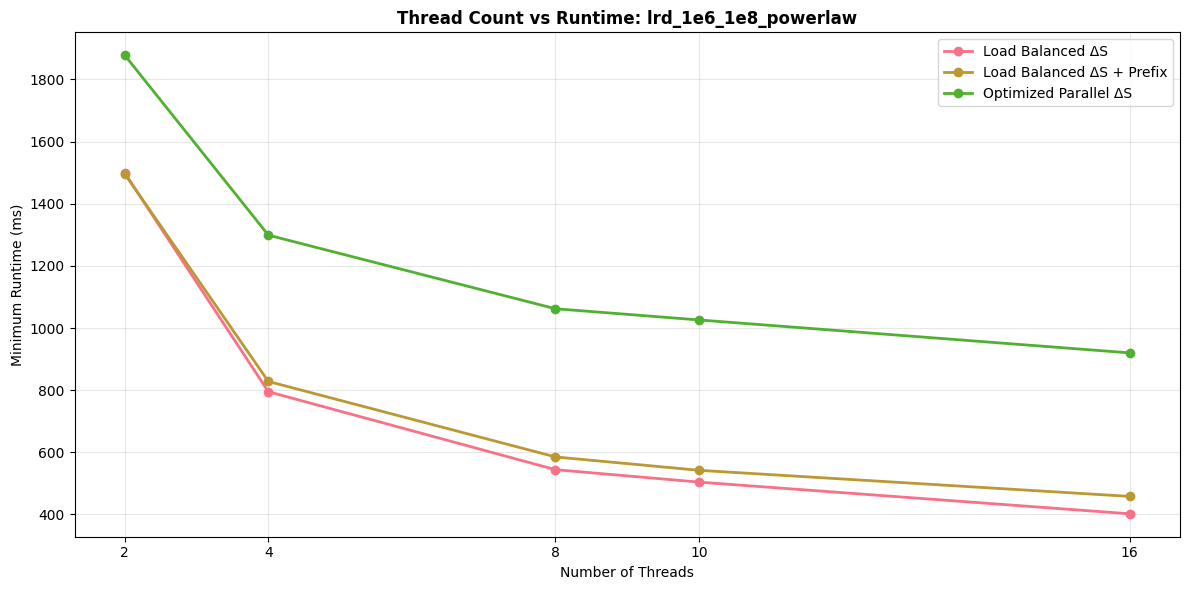

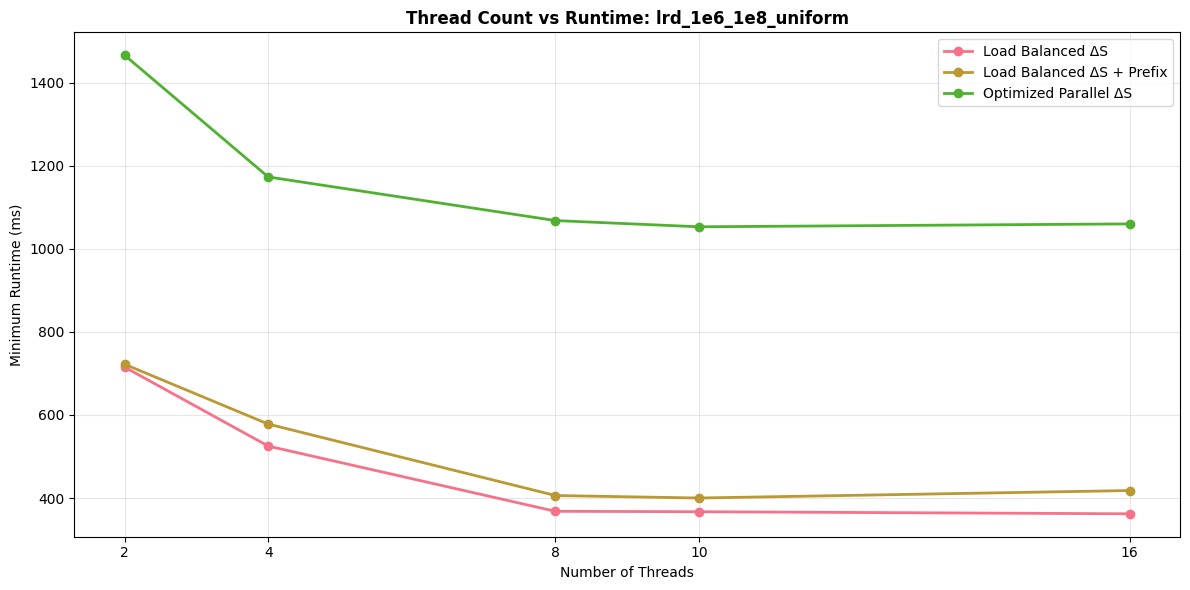

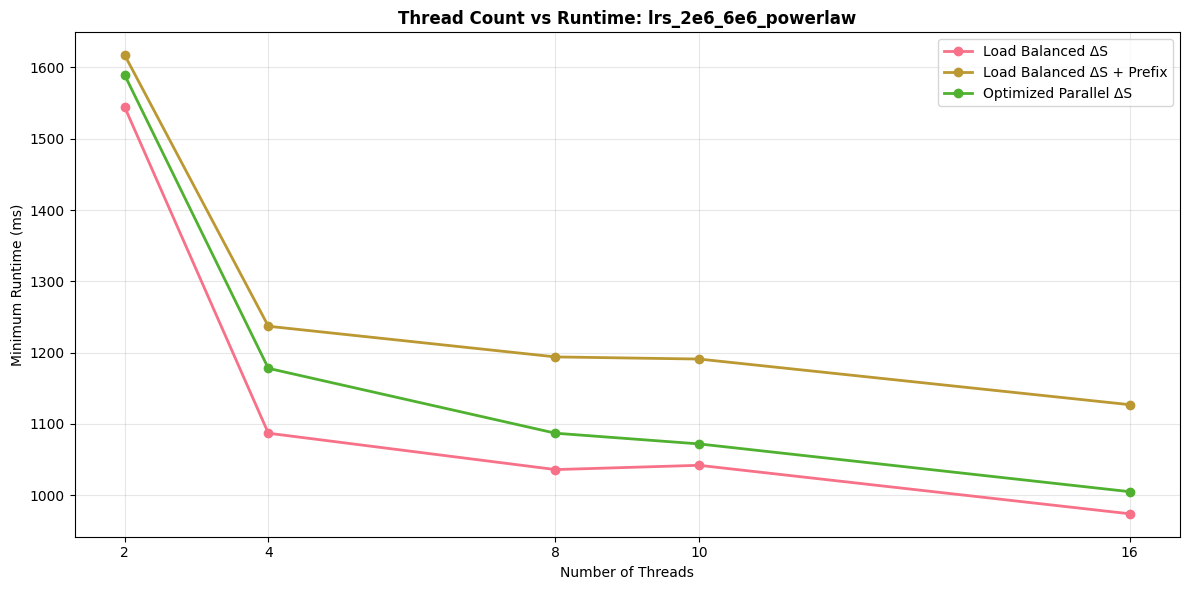

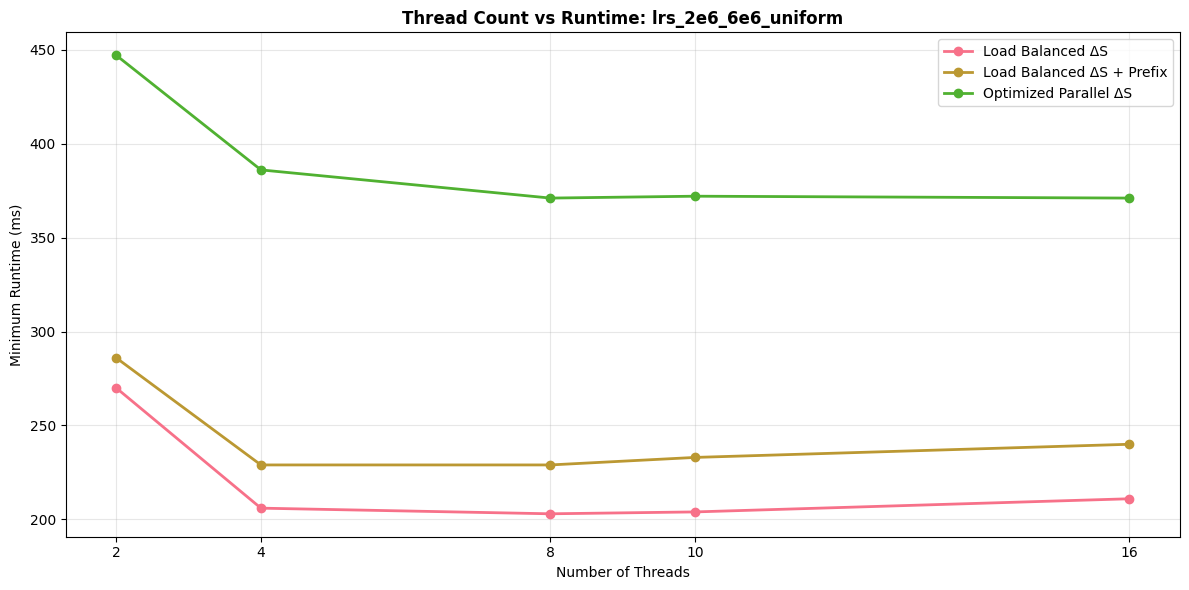

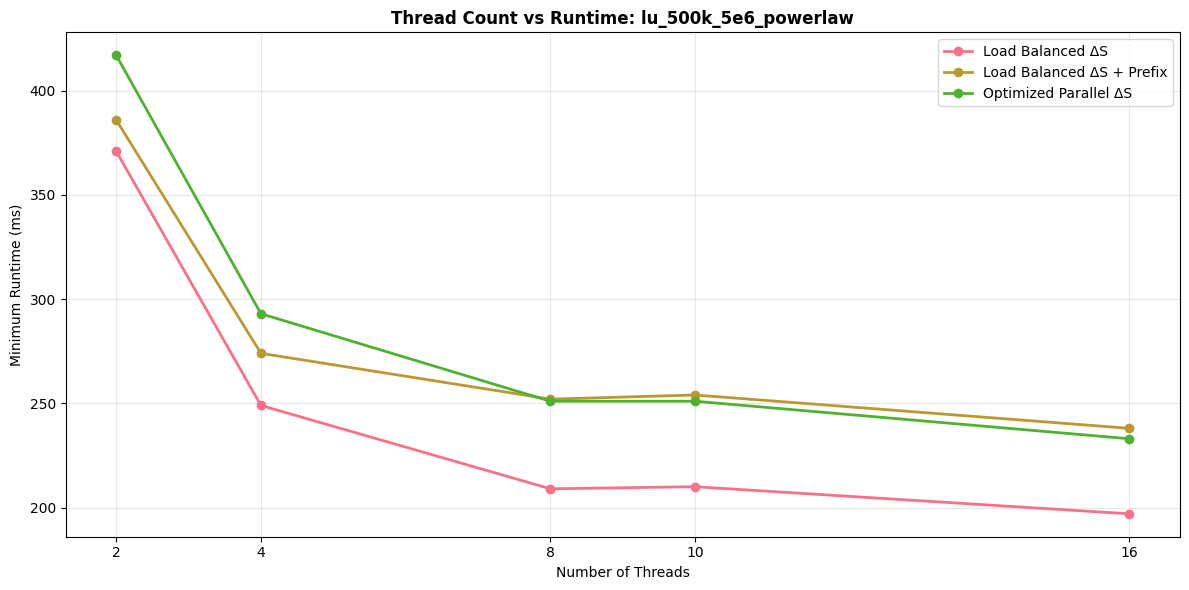

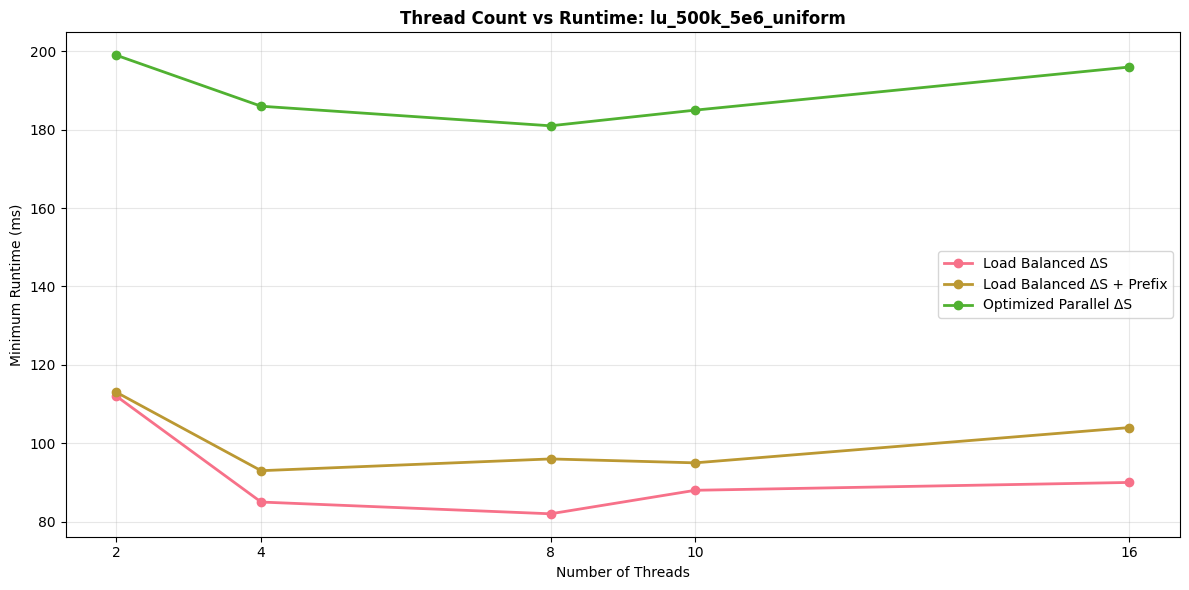

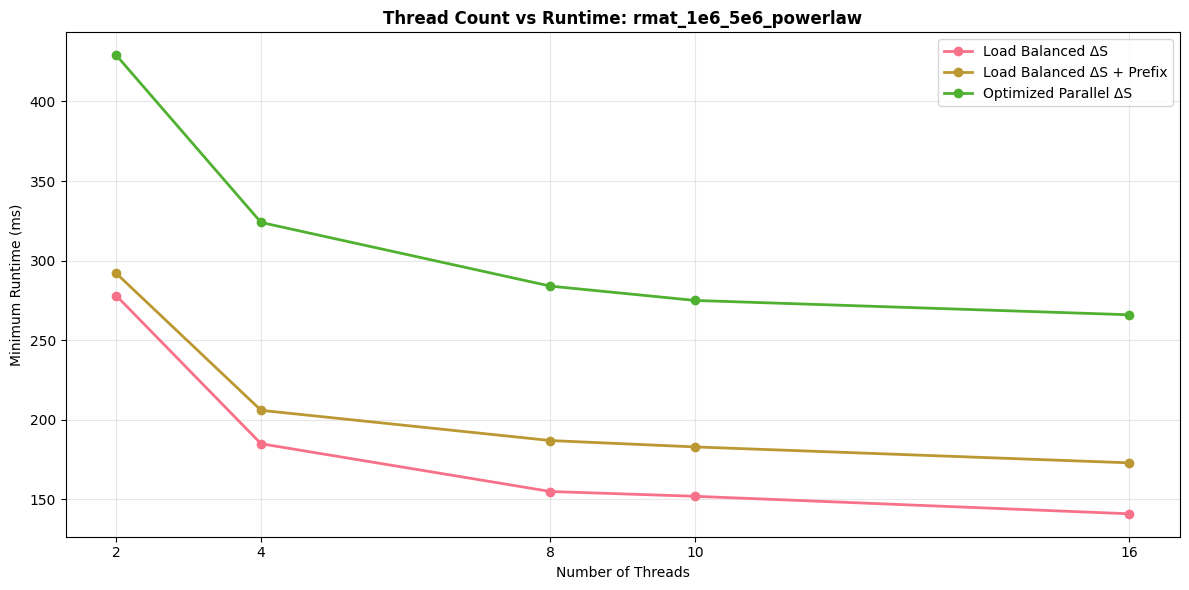

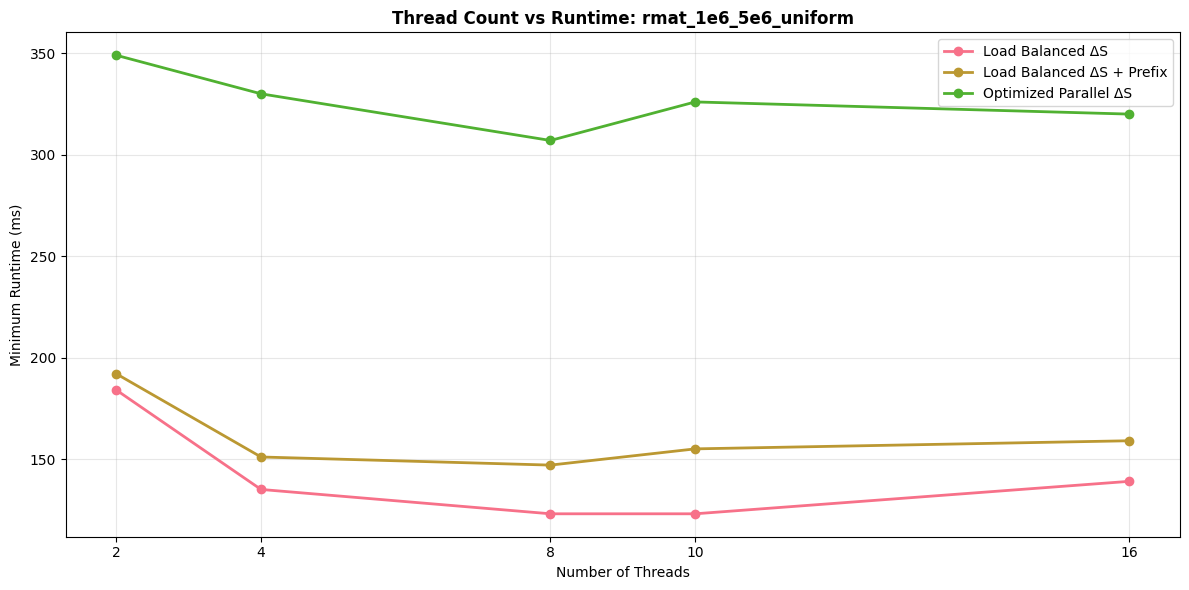

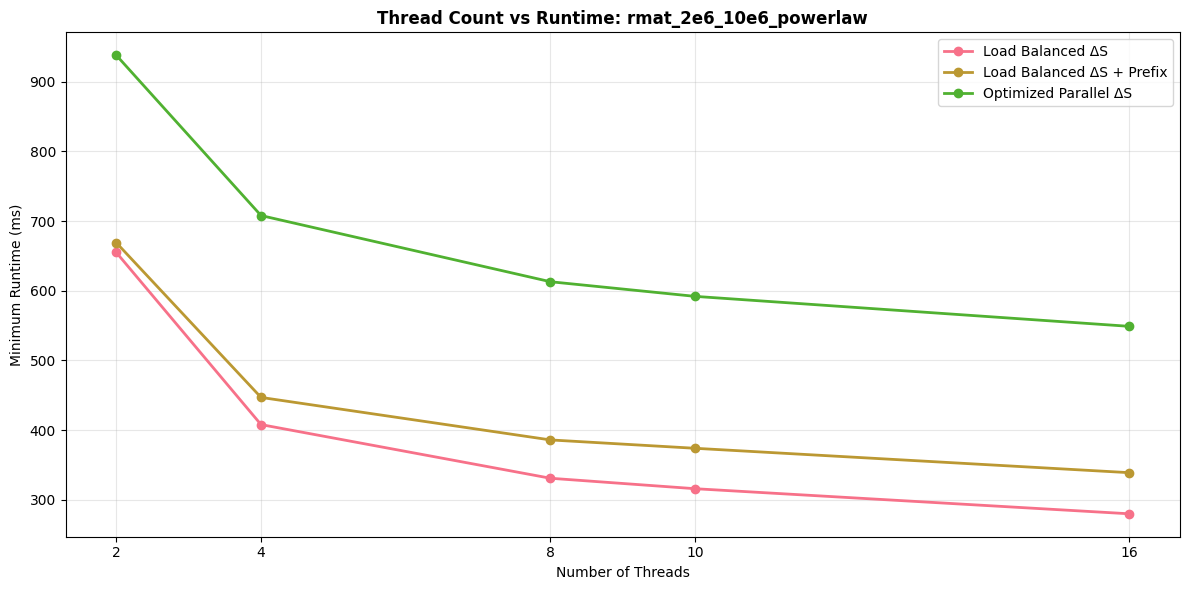

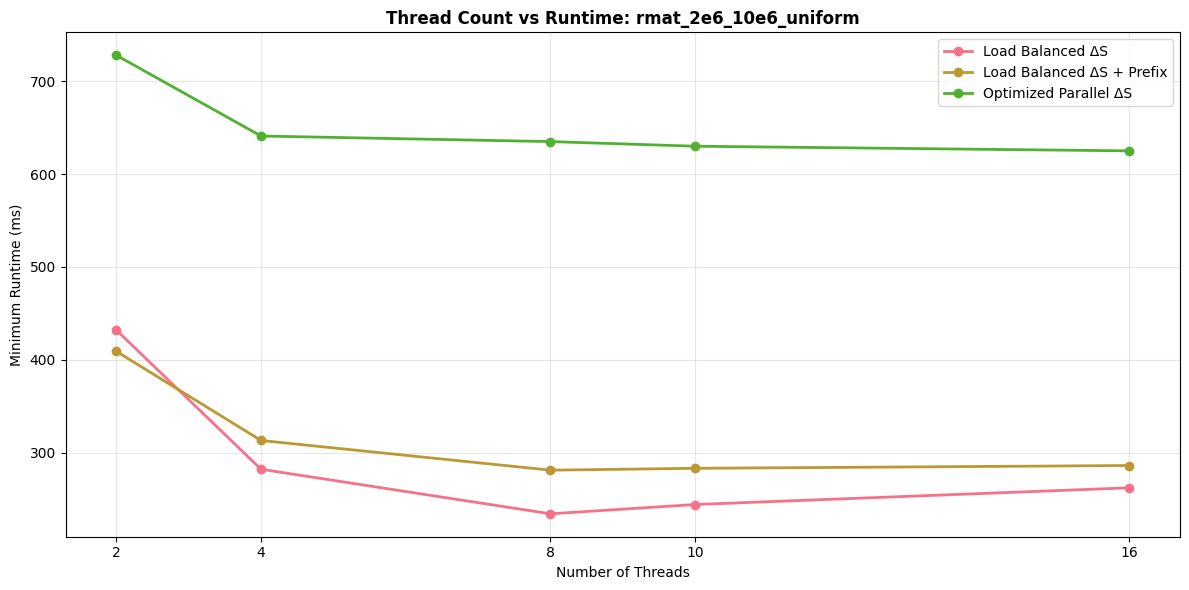

In [19]:
# Create thread count impact visualization - separate plots for each graph
graphs = thread_analysis['Graph_Name'].unique()
algorithms = thread_analysis['Algorithm_Short'].unique()

for graph in graphs:
    plt.figure(figsize=(12, 6))
    graph_data = thread_analysis[thread_analysis['Graph_Name'] == graph]
    
    for algorithm in algorithms:
        alg_data = graph_data[graph_data['Algorithm_Short'] == algorithm]
        if not alg_data.empty:
            plt.plot(alg_data['Threads'], alg_data['Min_Time_ms'], 
                    marker='o', linewidth=2, markersize=6, label=algorithm)
    
    plt.title(f'Thread Count vs Runtime: {graph}', fontsize=12, fontweight='bold')
    plt.xlabel('Number of Threads', fontsize=10)
    plt.ylabel('Minimum Runtime (ms)', fontsize=10)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(sorted(thread_analysis['Threads'].unique()))
    plt.tight_layout()
    plt.show()


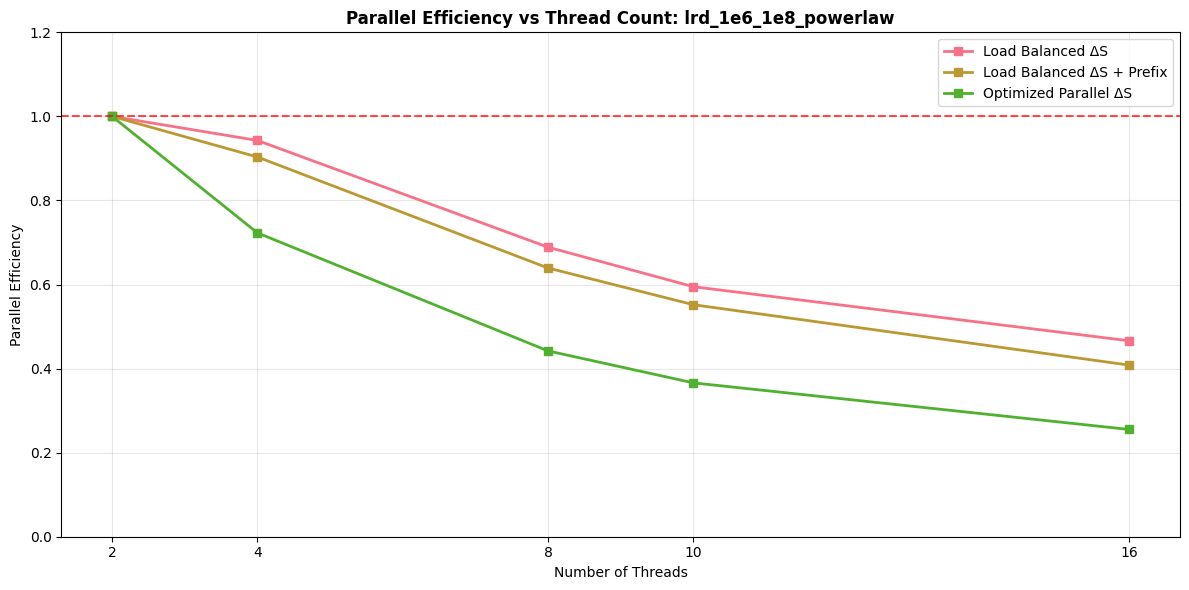

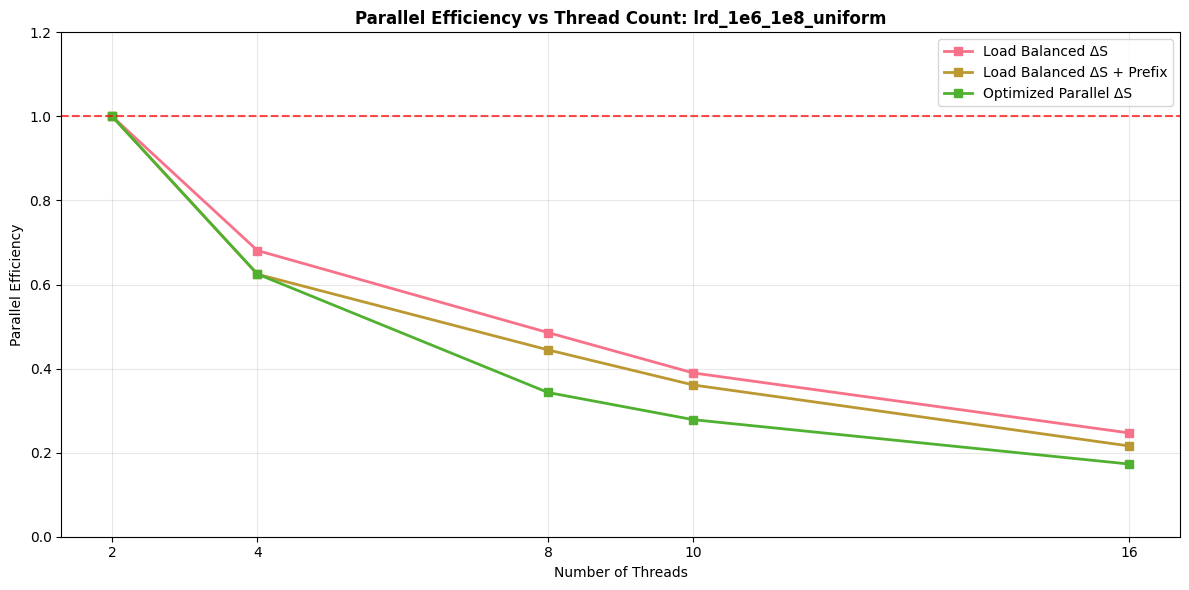

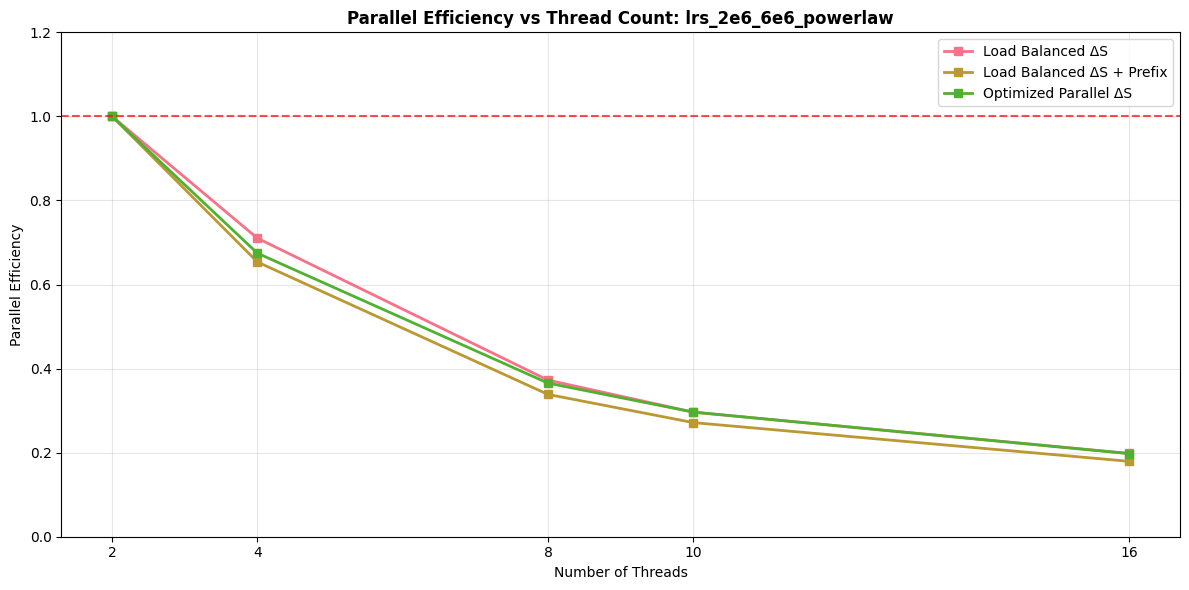

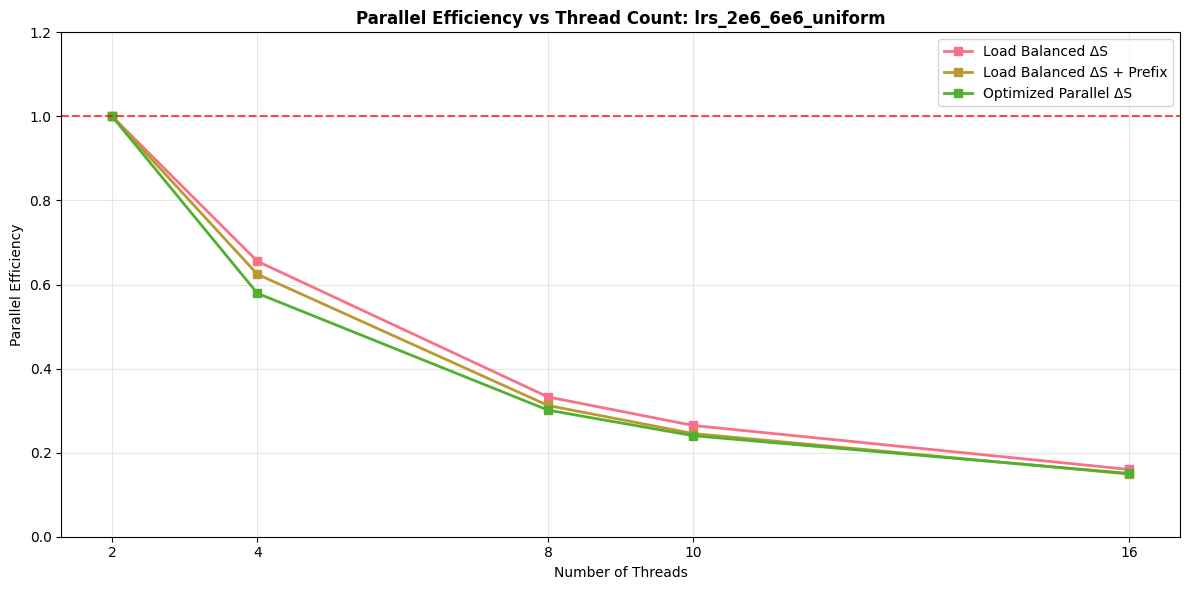

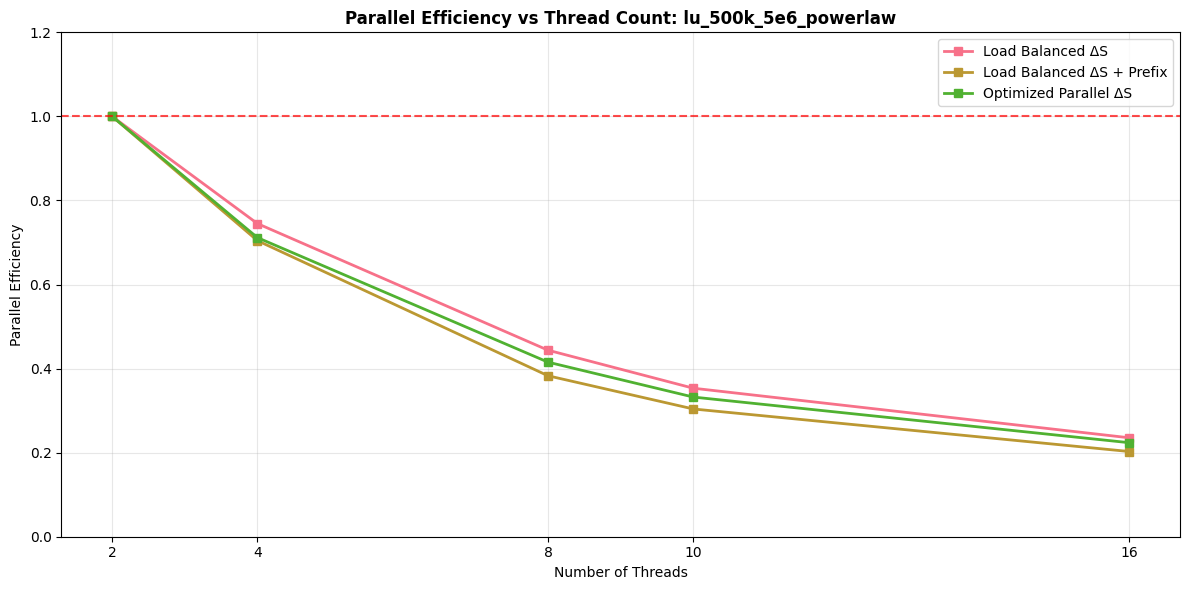

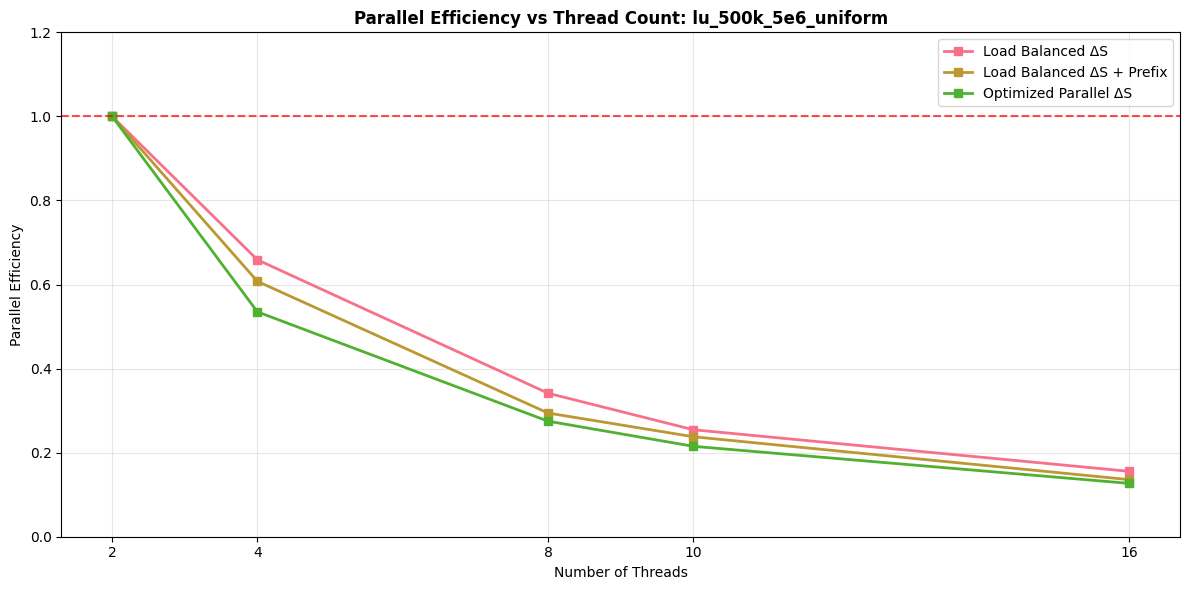

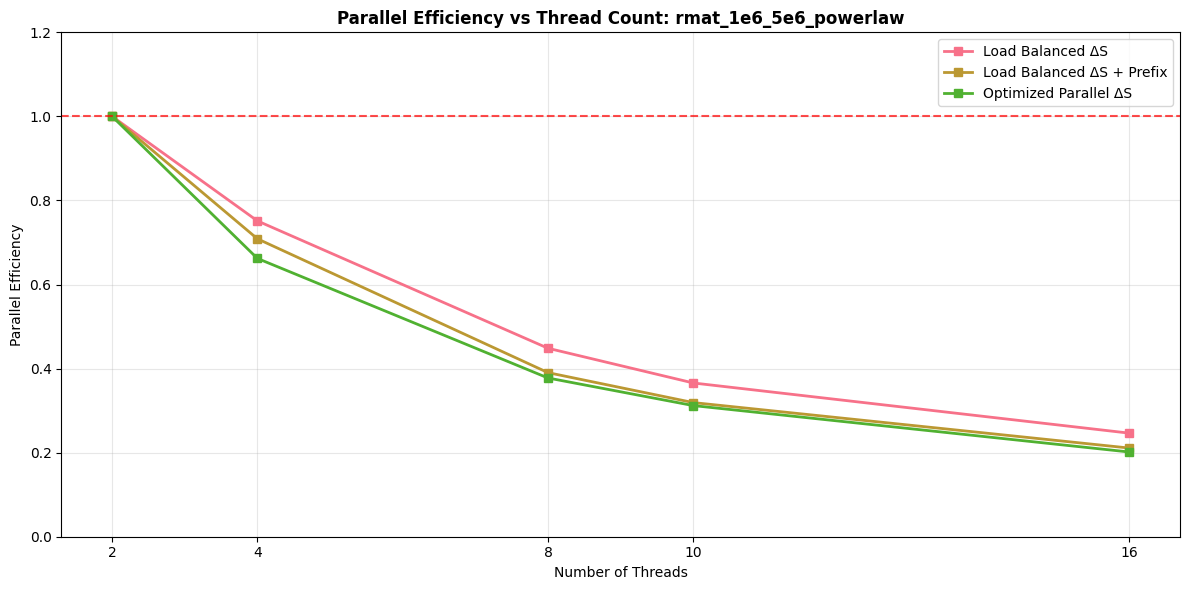

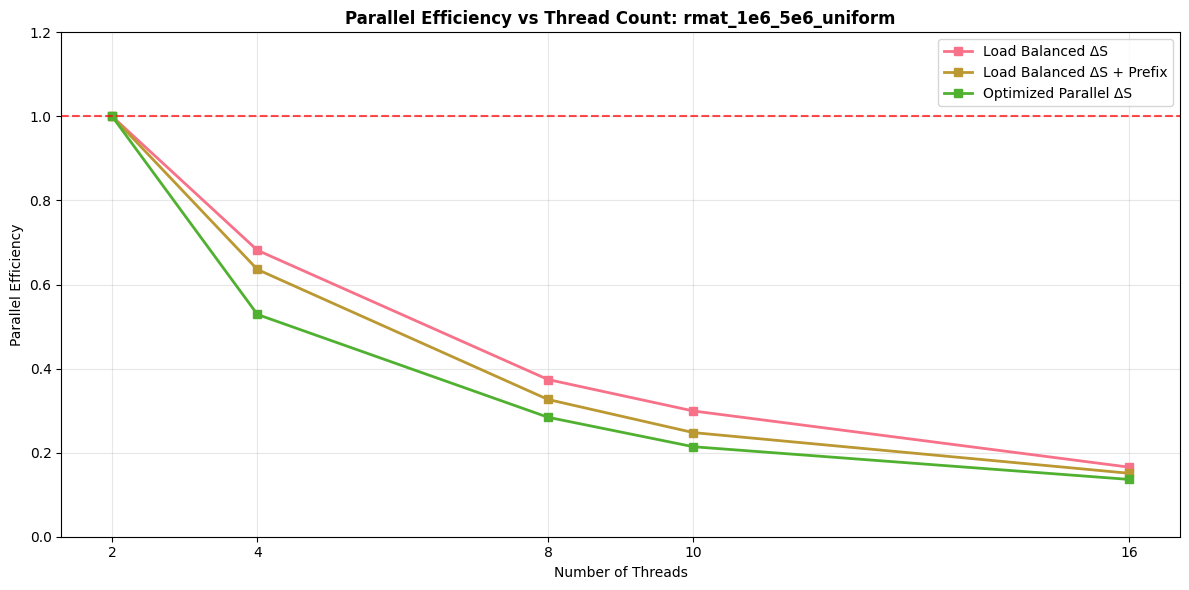

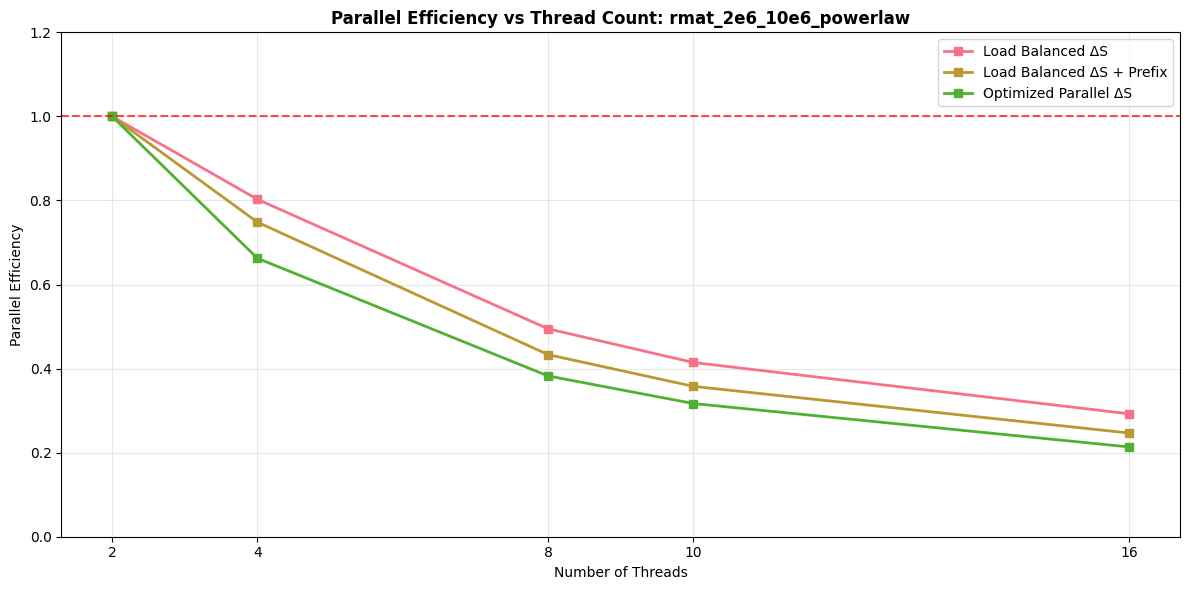

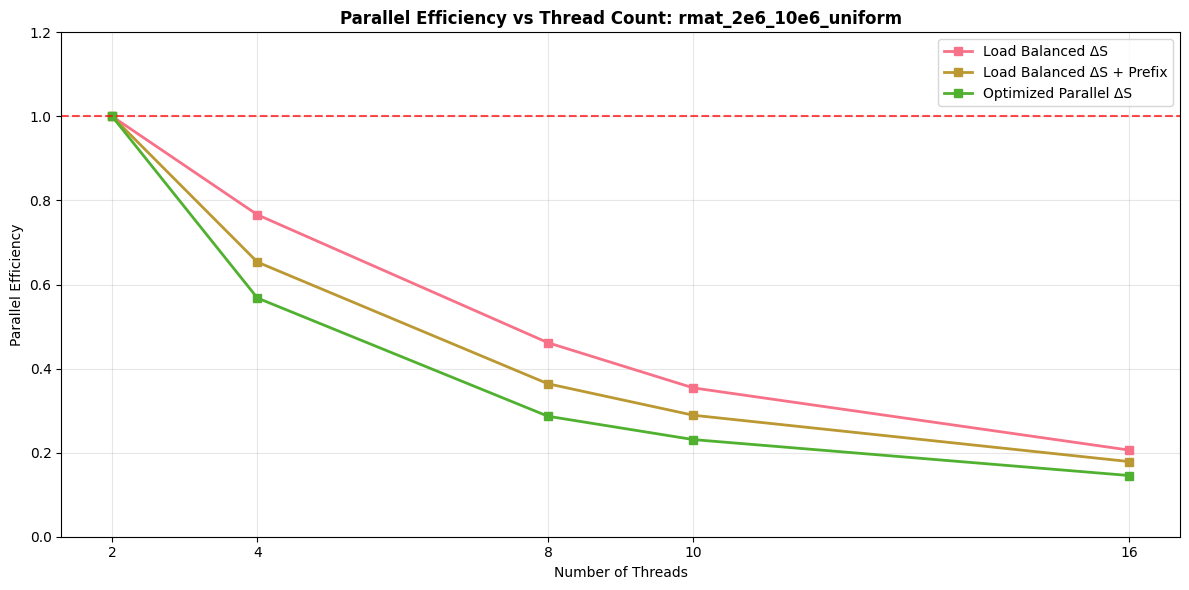

In [20]:
# Calculate parallel efficiency for each algorithm
efficiency_data = []

for graph in graphs:
    for algorithm in algorithms:
        alg_data = thread_analysis[
            (thread_analysis['Graph_Name'] == graph) & 
            (thread_analysis['Algorithm_Short'] == algorithm)
        ].sort_values('Threads')
        
        if len(alg_data) > 1:
            baseline_time = alg_data.iloc[0]['Min_Time_ms']  # Single thread performance
            baseline_threads = alg_data.iloc[0]['Threads']
            
            for _, row in alg_data.iterrows():
                speedup = baseline_time / row['Min_Time_ms']
                efficiency = speedup / (row['Threads'] / baseline_threads)
                efficiency_data.append({
                    'Graph_Name': graph,
                    'Algorithm_Short': algorithm,
                    'Threads': row['Threads'],
                    'Efficiency': efficiency
                })

efficiency_df = pd.DataFrame(efficiency_data)

# Plot parallel efficiency - separate plots for each graph
for graph in graphs:
    plt.figure(figsize=(12, 6))
    graph_data = efficiency_df[efficiency_df['Graph_Name'] == graph]
    
    for algorithm in algorithms:
        alg_data = graph_data[graph_data['Algorithm_Short'] == algorithm]
        if not alg_data.empty:
            plt.plot(alg_data['Threads'], alg_data['Efficiency'], 
                    marker='s', linewidth=2, markersize=6, label=algorithm)
    
    plt.title(f'Parallel Efficiency vs Thread Count: {graph}', fontsize=12, fontweight='bold')
    plt.xlabel('Number of Threads', fontsize=10)
    plt.ylabel('Parallel Efficiency', fontsize=10)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(sorted(efficiency_df['Threads'].unique()))
    plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Perfect Efficiency')
    plt.ylim(0, max(1.2, efficiency_df['Efficiency'].max() * 1.1))
    plt.tight_layout()
    plt.show()


In [21]:
# Aggregate performance across all test cases
# For each algorithm and thread count, find the average best runtime across all graphs and delta values

# First, get the best runtime for each graph-algorithm-thread combination (across all deltas)
best_runtime_per_config = parallel_df.groupby(['Graph_Name', 'Algorithm_Short', 'Threads'])['Min_Time_ms'].min().reset_index()

# Then, average across all graphs for each algorithm-thread combination
aggregated_performance = best_runtime_per_config.groupby(['Algorithm_Short', 'Threads'])['Min_Time_ms'].agg(['mean', 'std', 'count']).reset_index()

# Flatten the column names
aggregated_performance.columns = ['Algorithm_Short', 'Threads', 'mean_runtime', 'std_runtime', 'count']

print("Aggregated performance across all test cases:")
print(aggregated_performance.round(1))


Aggregated performance across all test cases:
              Algorithm_Short  Threads  mean_runtime  std_runtime  count
0            Load Balanced ΔS        2         606.0        518.5     10
1            Load Balanced ΔS        4         395.7        322.1     10
2            Load Balanced ΔS        8         328.5        283.0     10
3            Load Balanced ΔS       10         325.0        280.7     10
4            Load Balanced ΔS       16         305.8        254.7     10
5   Load Balanced ΔS + Prefix        2         618.2        530.5     10
6   Load Balanced ΔS + Prefix        4         435.6        357.7     10
7   Load Balanced ΔS + Prefix        8         376.3        320.8     10
8   Load Balanced ΔS + Prefix       10         371.0        316.4     10
9   Load Balanced ΔS + Prefix       16         354.2        293.8     10
10      Optimized Parallel ΔS        2         844.0        596.9     10
11      Optimized Parallel ΔS        4         651.8        421.4     10
12   

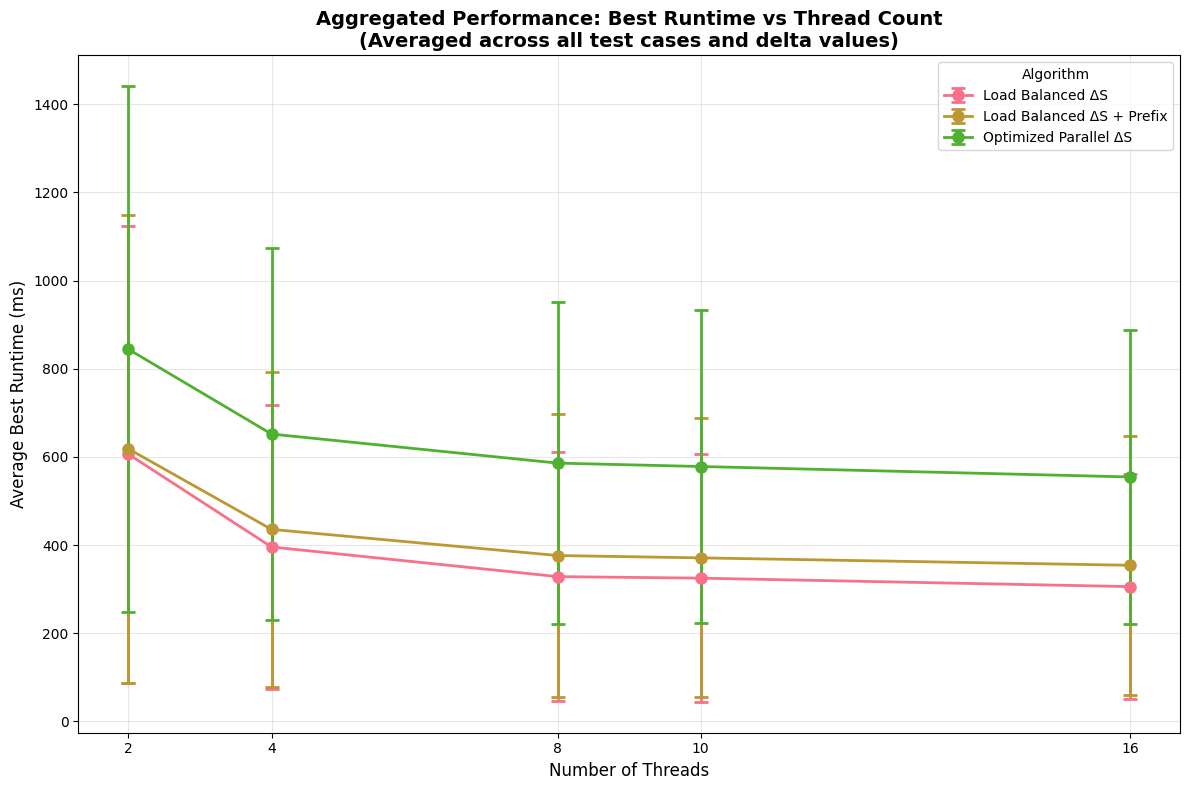

In [22]:
# Plot aggregated performance: Best Runtime vs Thread Count (averaged across all test cases and deltas)
plt.figure(figsize=(12, 8))

for algorithm in algorithms:
    alg_data = aggregated_performance[aggregated_performance['Algorithm_Short'] == algorithm]
    if not alg_data.empty:
        plt.errorbar(alg_data['Threads'], alg_data['mean_runtime'], 
                    yerr=alg_data['std_runtime'],
                    marker='o', linewidth=2, markersize=8, capsize=5, capthick=2,
                    label=algorithm)

plt.title('Aggregated Performance: Best Runtime vs Thread Count\n(Averaged across all test cases and delta values)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('Average Best Runtime (ms)', fontsize=12)
plt.legend(title='Algorithm', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(sorted(aggregated_performance['Threads'].unique()))
plt.tight_layout()
plt.show()


In [23]:
# Calculate aggregated speedup and efficiency relative to single-threaded performance
aggregated_speedup_data = []

for algorithm in algorithms:
    alg_data = best_runtime_per_config[best_runtime_per_config['Algorithm_Short'] == algorithm]
    
    # For each graph, calculate speedup relative to lowest thread count for that algorithm
    for graph in alg_data['Graph_Name'].unique():
        graph_alg_data = alg_data[alg_data['Graph_Name'] == graph].sort_values('Threads')
        
        if len(graph_alg_data) > 1:
            baseline_time = graph_alg_data.iloc[0]['Min_Time_ms']
            baseline_threads = graph_alg_data.iloc[0]['Threads']
            
            for _, row in graph_alg_data.iterrows():
                speedup = baseline_time / row['Min_Time_ms']
                efficiency = speedup / (row['Threads'] / baseline_threads)
                
                aggregated_speedup_data.append({
                    'Graph_Name': graph,
                    'Algorithm_Short': algorithm,
                    'Threads': row['Threads'],
                    'Speedup': speedup,
                    'Efficiency': efficiency
                })

aggregated_speedup_df = pd.DataFrame(aggregated_speedup_data)

# Average speedup and efficiency across all graphs
avg_speedup_efficiency = aggregated_speedup_df.groupby(['Algorithm_Short', 'Threads'])[['Speedup', 'Efficiency']].agg(['mean', 'std']).reset_index()

# Flatten the column names
avg_speedup_efficiency.columns = ['Algorithm_Short', 'Threads', 'speedup_mean', 'speedup_std', 'efficiency_mean', 'efficiency_std']

print("Average speedup and efficiency across all test cases:")
print(avg_speedup_efficiency.round(3))


Average speedup and efficiency across all test cases:
              Algorithm_Short  Threads  speedup_mean  speedup_std  \
0            Load Balanced ΔS        2         1.000        0.000   
1            Load Balanced ΔS        4         1.479        0.173   
2            Load Balanced ΔS        8         1.777        0.416   
3            Load Balanced ΔS       10         1.794        0.492   
4            Load Balanced ΔS       16         1.898        0.735   
5   Load Balanced ΔS + Prefix        2         1.000        0.000   
6   Load Balanced ΔS + Prefix        4         1.373        0.177   
7   Load Balanced ΔS + Prefix        8         1.570        0.399   
8   Load Balanced ΔS + Prefix       10         1.593        0.465   
9   Load Balanced ΔS + Prefix       16         1.663        0.627   
10      Optimized Parallel ΔS        2         1.000        0.000   
11      Optimized Parallel ΔS        4         1.254        0.141   
12      Optimized Parallel ΔS        8         1.

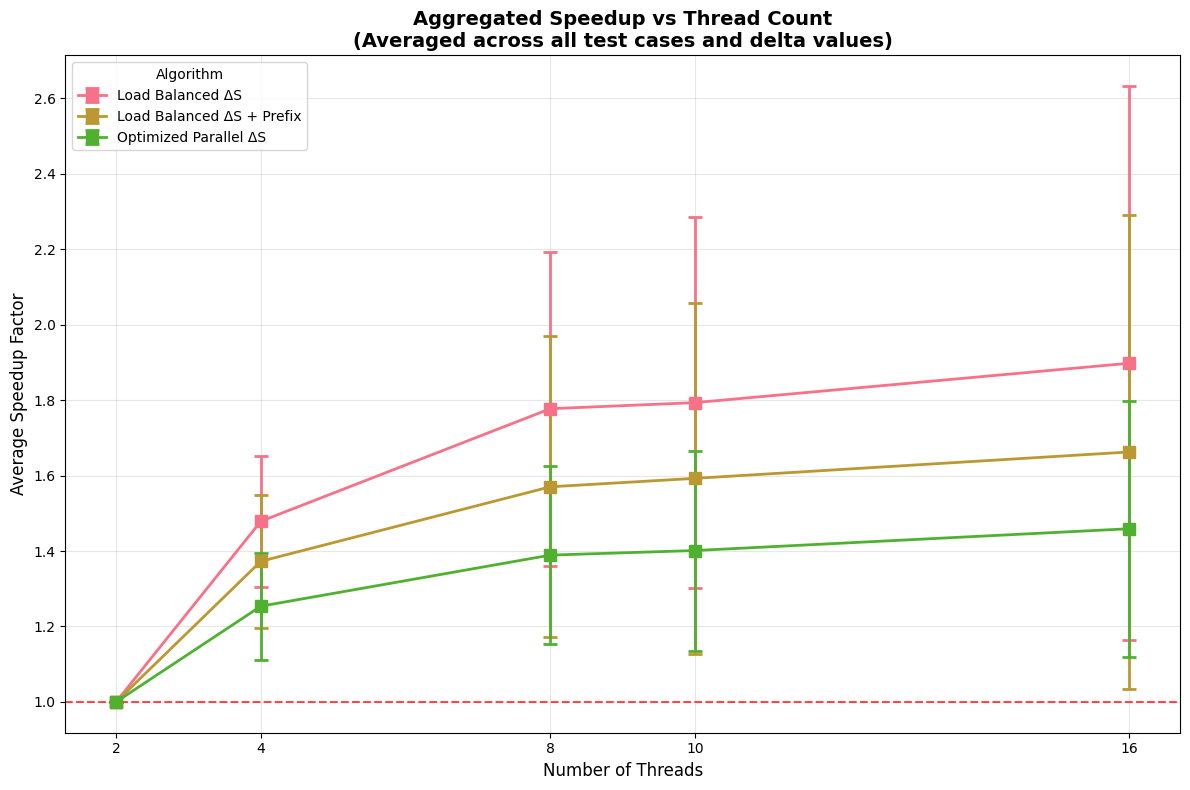

In [24]:
# Plot aggregated speedup across all test cases
plt.figure(figsize=(12, 8))

for algorithm in algorithms:
    alg_data = avg_speedup_efficiency[avg_speedup_efficiency['Algorithm_Short'] == algorithm]
    if not alg_data.empty:
        plt.errorbar(alg_data['Threads'], alg_data['speedup_mean'], 
                    yerr=alg_data['speedup_std'],
                    marker='s', linewidth=2, markersize=8, capsize=5, capthick=2,
                    label=algorithm)

plt.title('Aggregated Speedup vs Thread Count\n(Averaged across all test cases and delta values)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('Average Speedup Factor', fontsize=12)
plt.legend(title='Algorithm', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(sorted(avg_speedup_efficiency['Threads'].unique()))
plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Baseline (1x)')
plt.tight_layout()
plt.show()


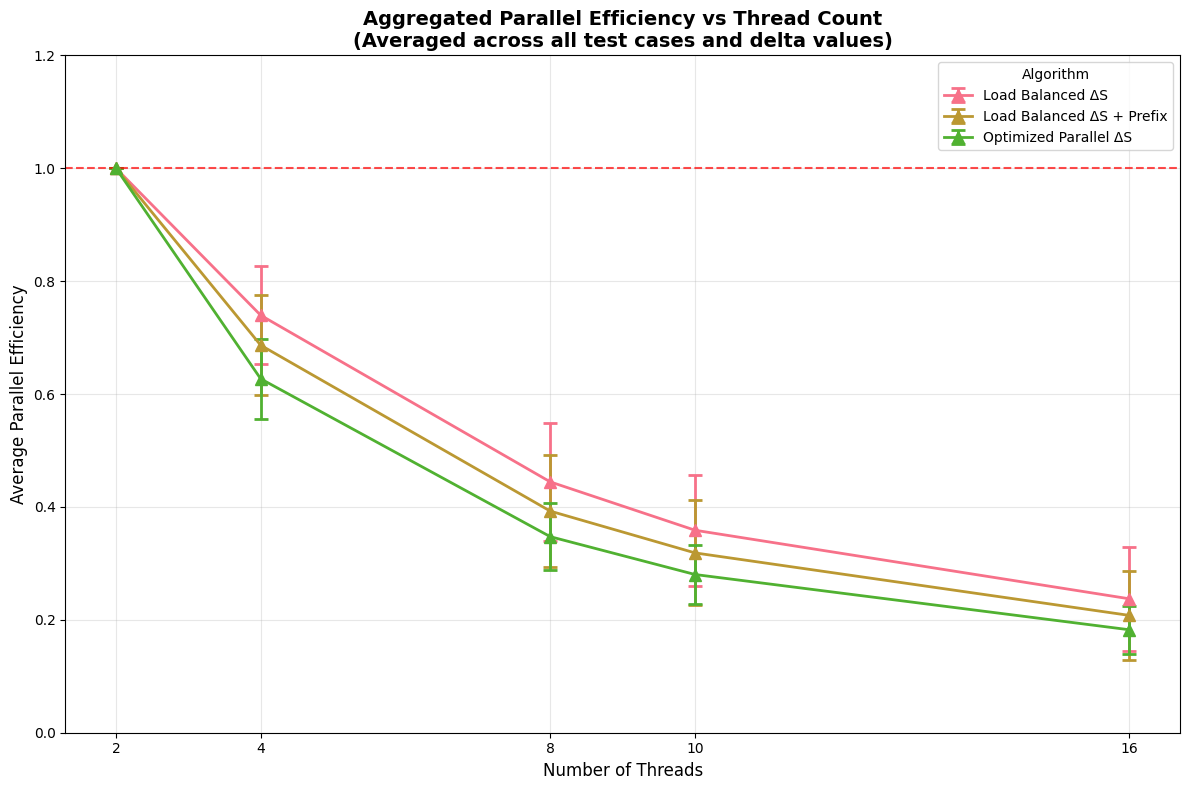

In [25]:
# Plot aggregated efficiency across all test cases
plt.figure(figsize=(12, 8))

for algorithm in algorithms:
    alg_data = avg_speedup_efficiency[avg_speedup_efficiency['Algorithm_Short'] == algorithm]
    if not alg_data.empty:
        plt.errorbar(alg_data['Threads'], alg_data['efficiency_mean'], 
                    yerr=alg_data['efficiency_std'],
                    marker='^', linewidth=2, markersize=8, capsize=5, capthick=2,
                    label=algorithm)

plt.title('Aggregated Parallel Efficiency vs Thread Count\n(Averaged across all test cases and delta values)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('Average Parallel Efficiency', fontsize=12)
plt.legend(title='Algorithm', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(sorted(avg_speedup_efficiency['Threads'].unique()))
plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Perfect Efficiency')
plt.ylim(0, max(1.2, avg_speedup_efficiency['efficiency_mean'].max() * 1.1))
plt.tight_layout()
plt.show()


In [26]:
# For each graph, algorithm, and delta value, find minimum runtime across thread counts
delta_analysis = parallel_df.groupby(['Graph_Name', 'Algorithm_Short', 'Delta'])['Min_Time_ms'].min().reset_index()

print("Sample of delta analysis data:")
print(delta_analysis.head(10))
print("\nDelta values in dataset:", sorted(delta_analysis['Delta'].unique()))


Sample of delta analysis data:
             Graph_Name   Algorithm_Short  Delta  Min_Time_ms
0  lrd_1e6_1e8_powerlaw  Load Balanced ΔS    0.0          428
1  lrd_1e6_1e8_powerlaw  Load Balanced ΔS    0.1          416
2  lrd_1e6_1e8_powerlaw  Load Balanced ΔS    0.2          423
3  lrd_1e6_1e8_powerlaw  Load Balanced ΔS    0.3          426
4  lrd_1e6_1e8_powerlaw  Load Balanced ΔS    0.4          402
5  lrd_1e6_1e8_powerlaw  Load Balanced ΔS    0.5          417
6  lrd_1e6_1e8_powerlaw  Load Balanced ΔS    0.6          406
7  lrd_1e6_1e8_powerlaw  Load Balanced ΔS    0.7          414
8  lrd_1e6_1e8_powerlaw  Load Balanced ΔS    0.8          405
9  lrd_1e6_1e8_powerlaw  Load Balanced ΔS    0.9          407

Delta values in dataset: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


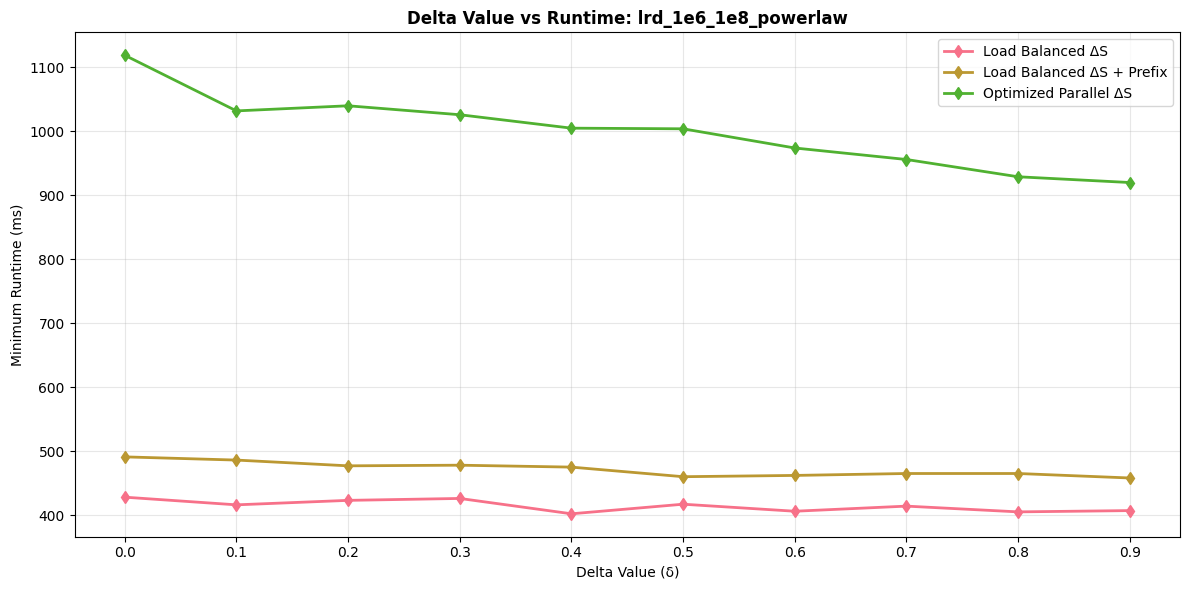

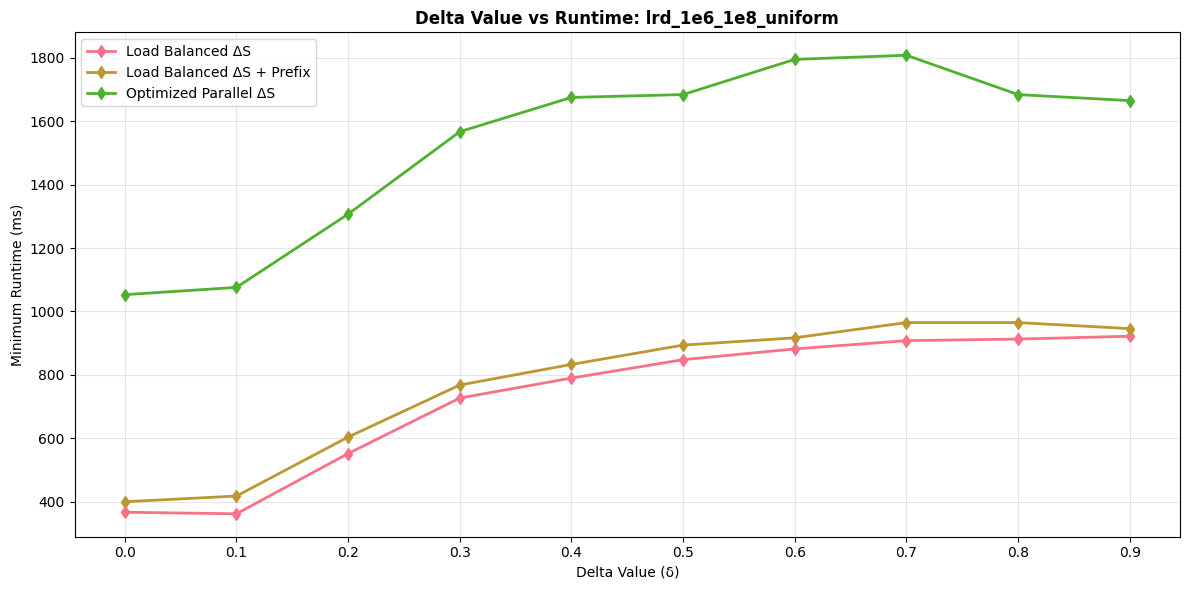

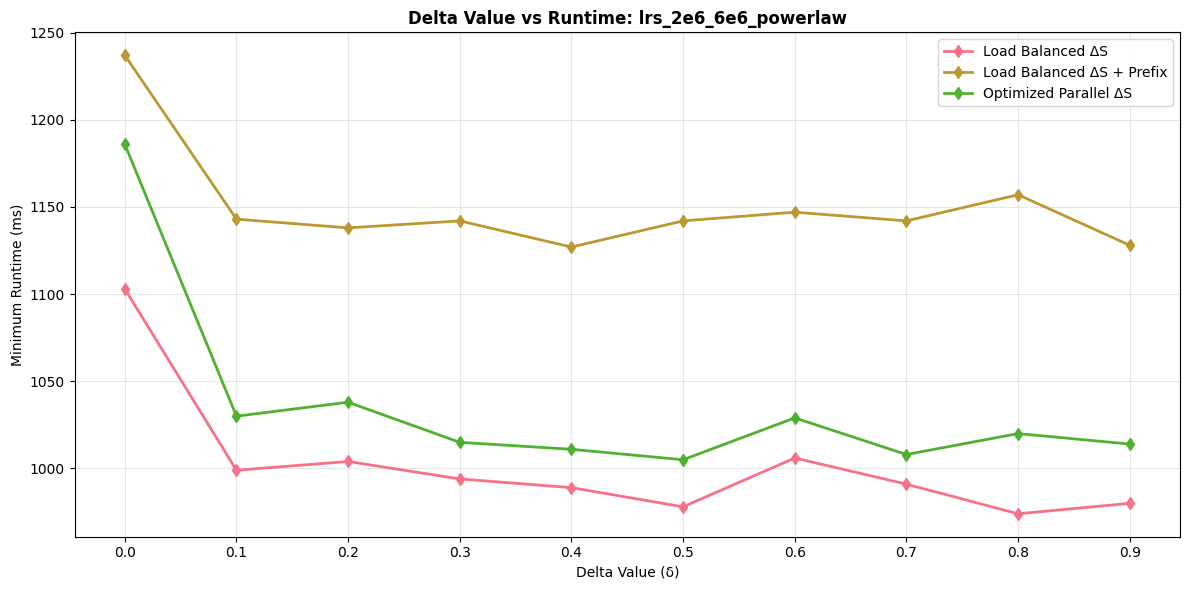

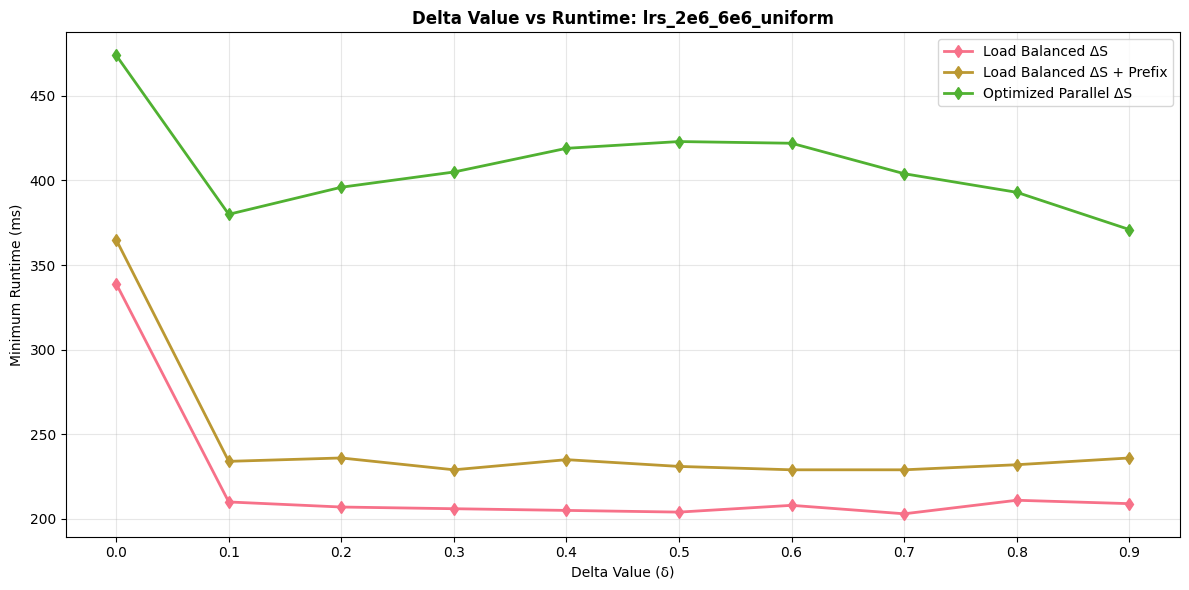

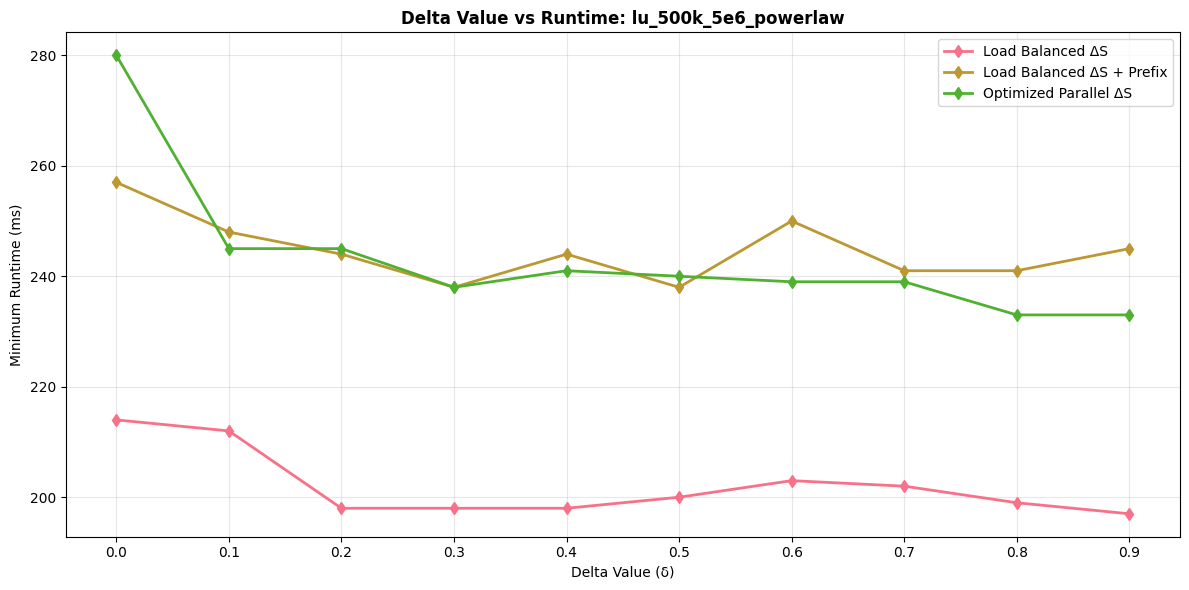

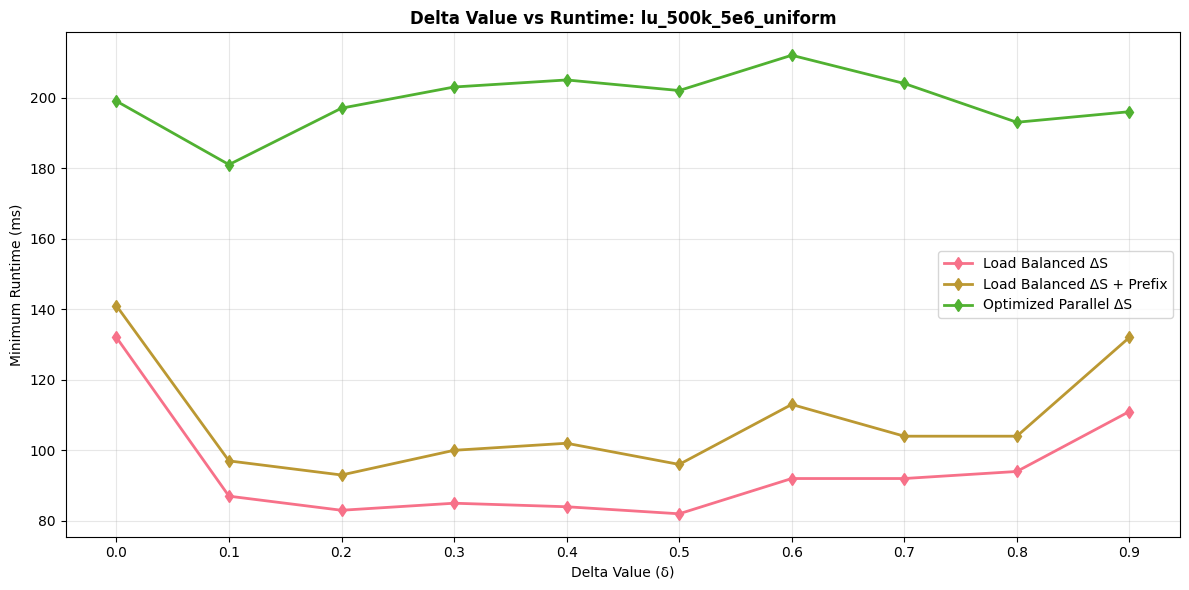

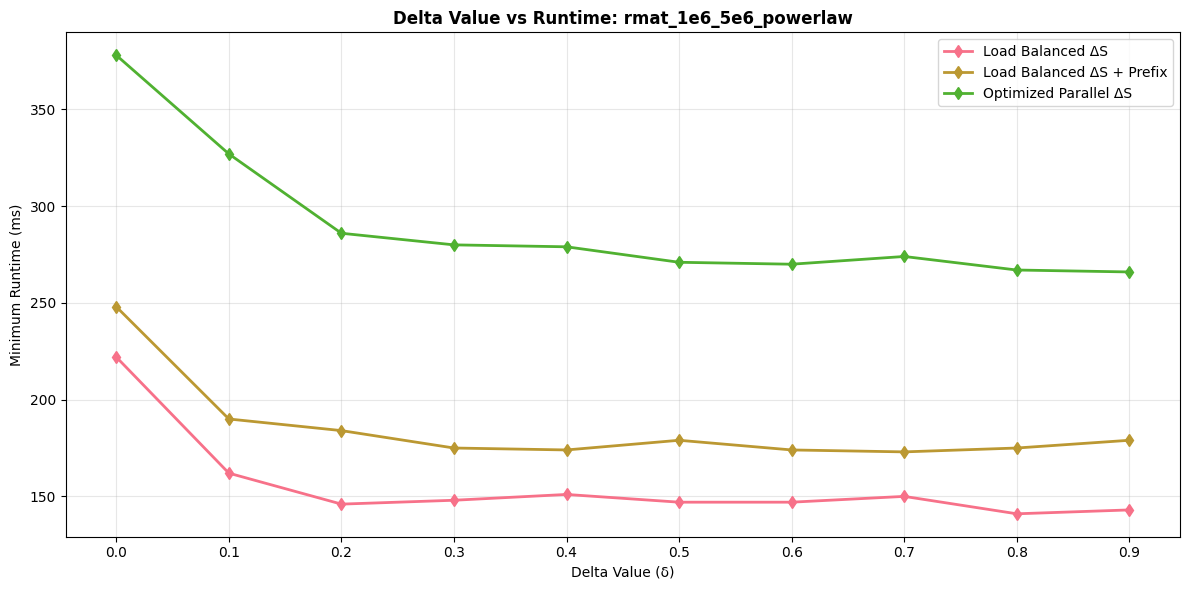

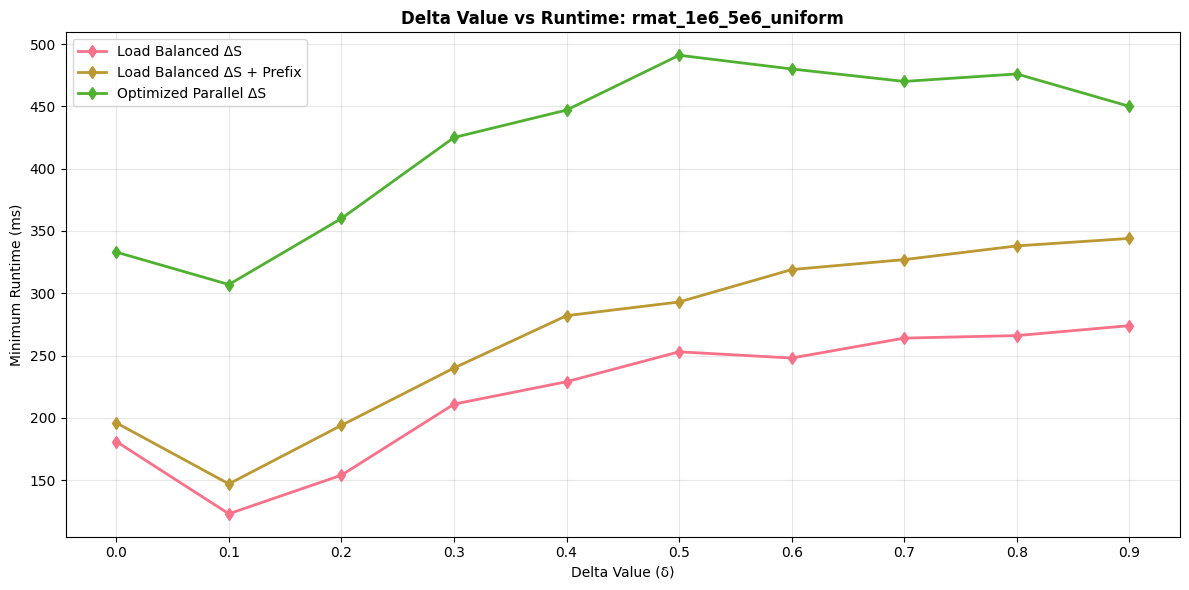

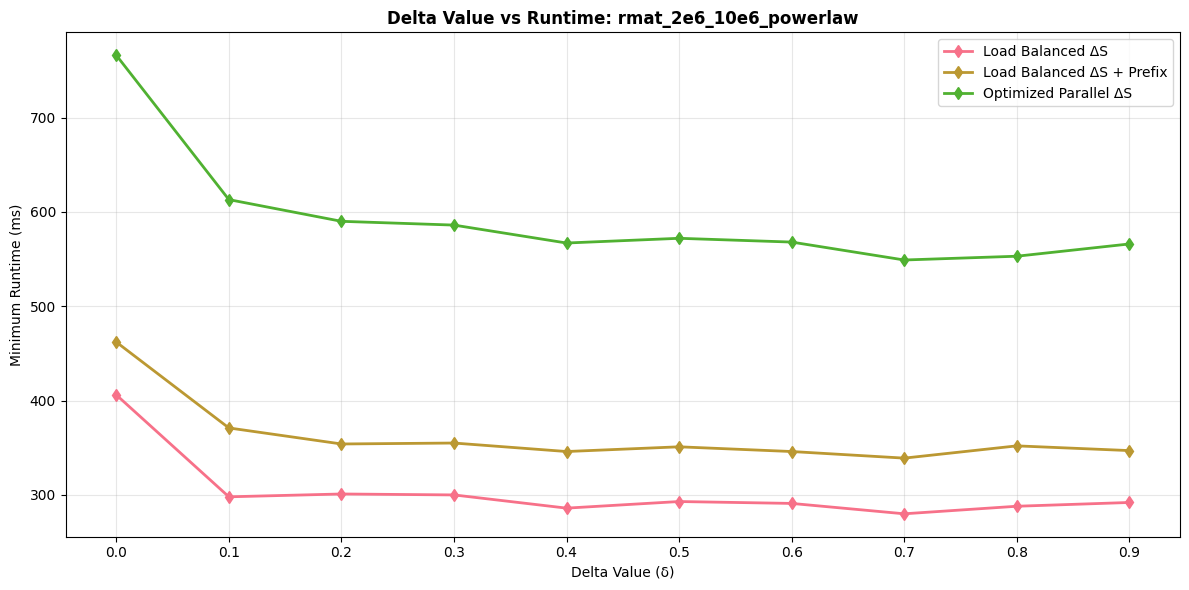

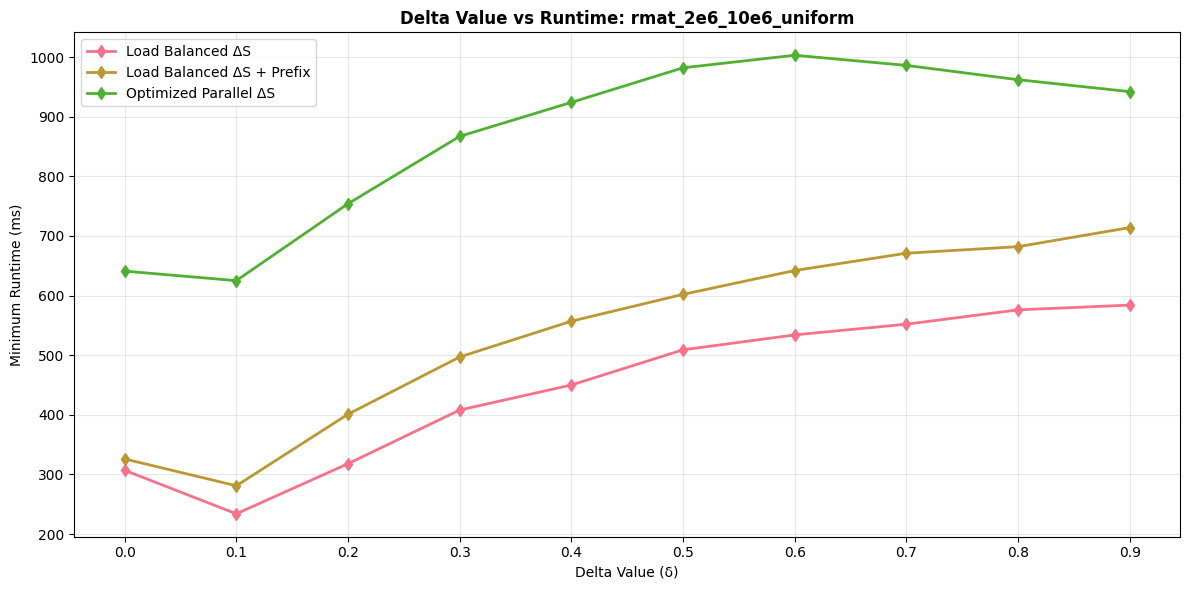

In [27]:
# Create delta value impact visualization - separate plots for each graph
for graph in graphs:
    plt.figure(figsize=(12, 6))
    graph_data = delta_analysis[delta_analysis['Graph_Name'] == graph]
    
    for algorithm in algorithms:
        alg_data = graph_data[graph_data['Algorithm_Short'] == algorithm]
        if not alg_data.empty:
            # Sort by delta for proper line plotting
            alg_data = alg_data.sort_values('Delta')
            plt.plot(alg_data['Delta'], alg_data['Min_Time_ms'], 
                    marker='d', linewidth=2, markersize=6, label=algorithm)
    
    plt.title(f'Delta Value vs Runtime: {graph}', fontsize=12, fontweight='bold')
    plt.xlabel('Delta Value (δ)', fontsize=10)
    plt.ylabel('Minimum Runtime (ms)', fontsize=10)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(sorted(delta_analysis['Delta'].unique()))
    plt.tight_layout()
    plt.show()


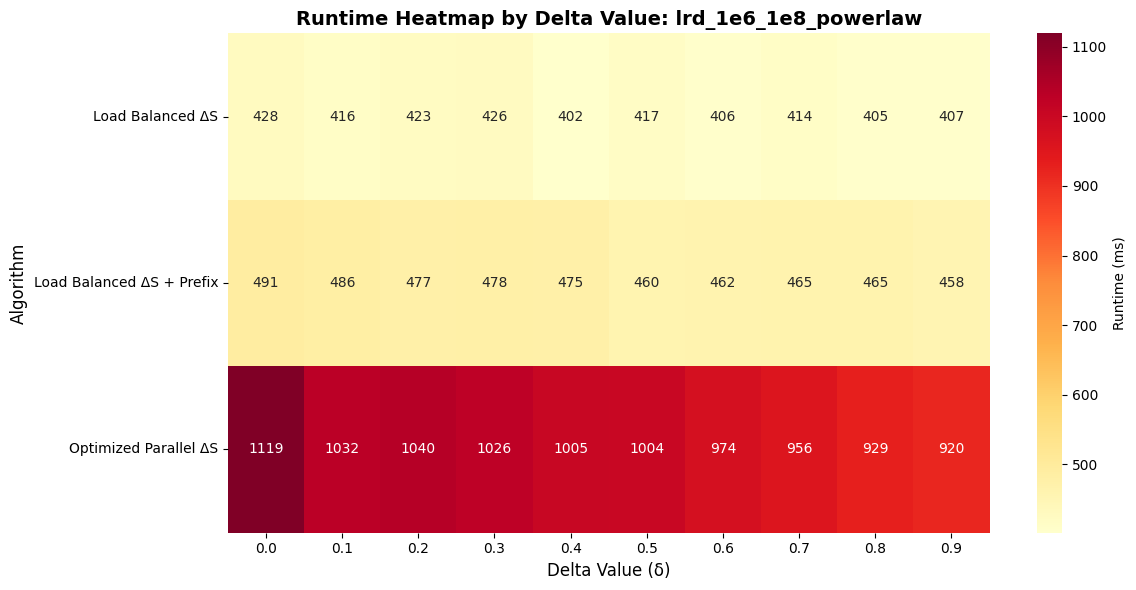

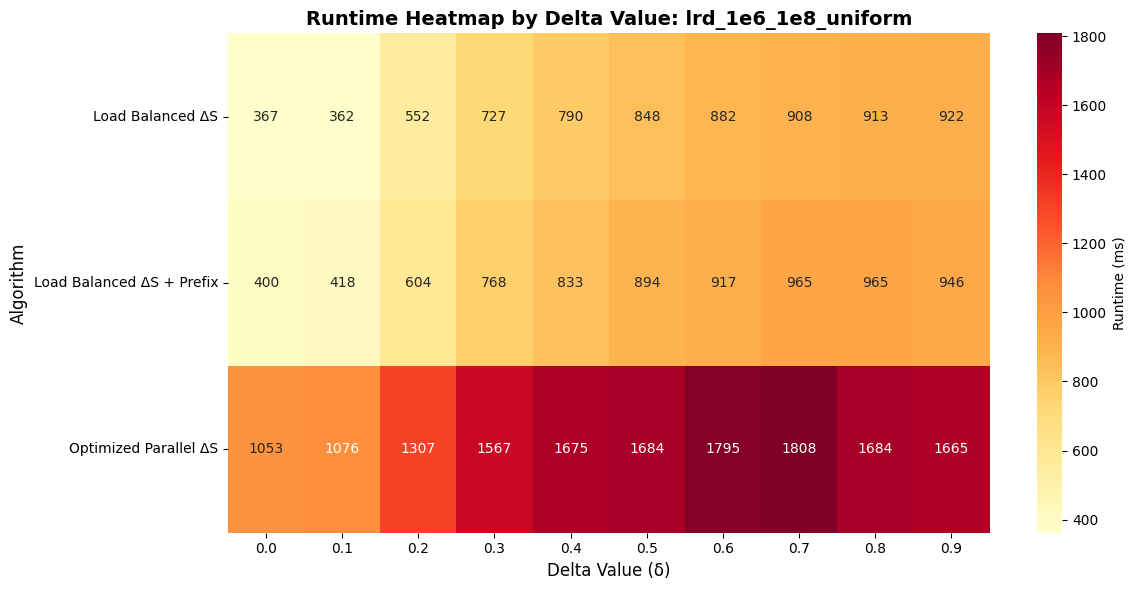

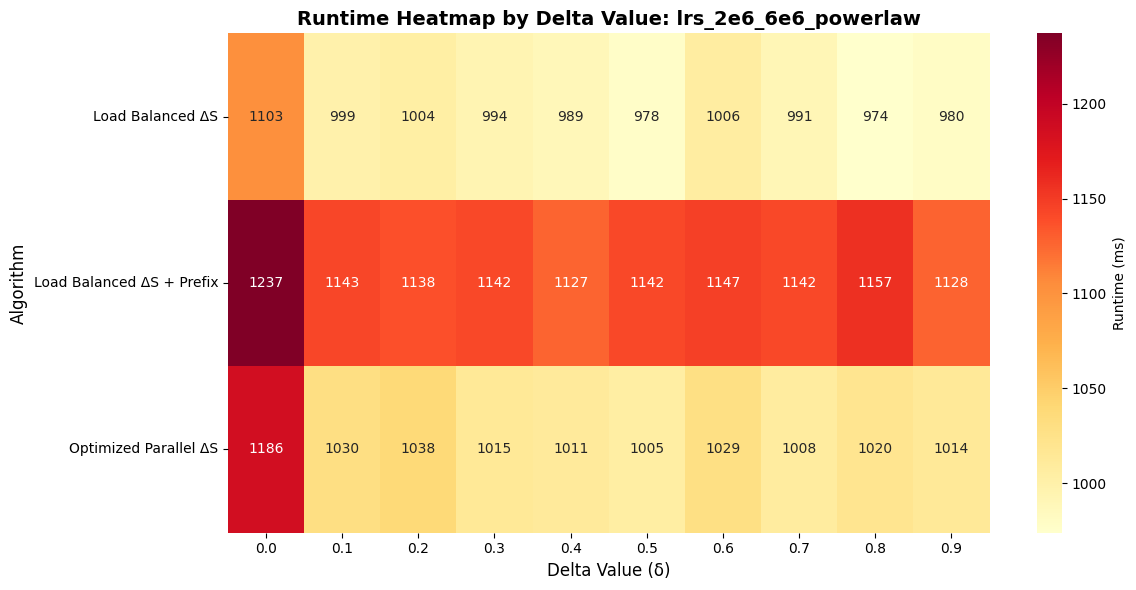

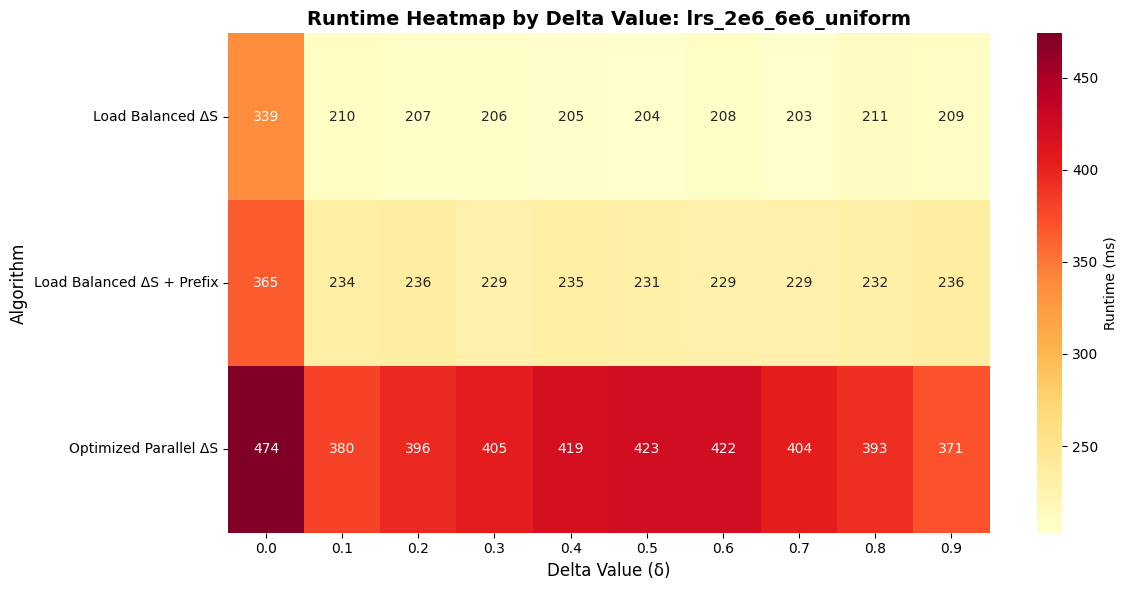

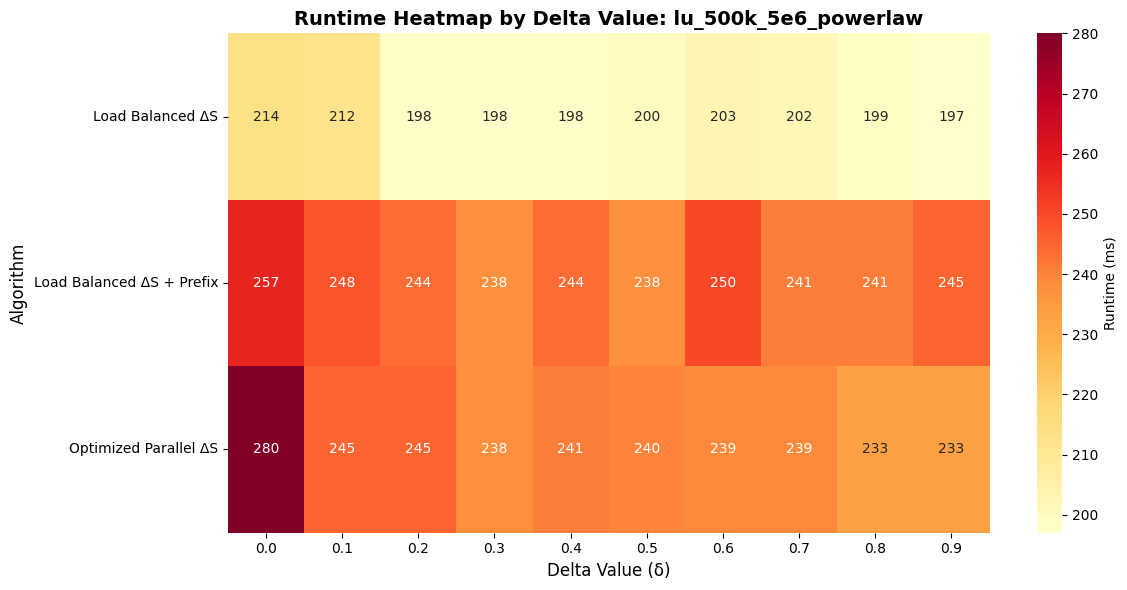

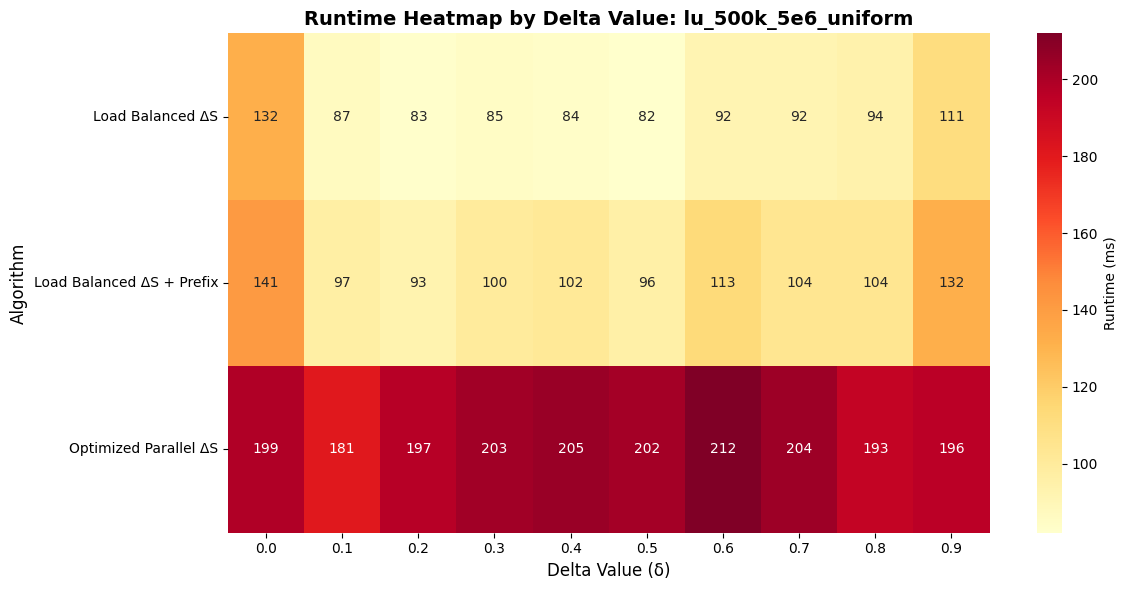

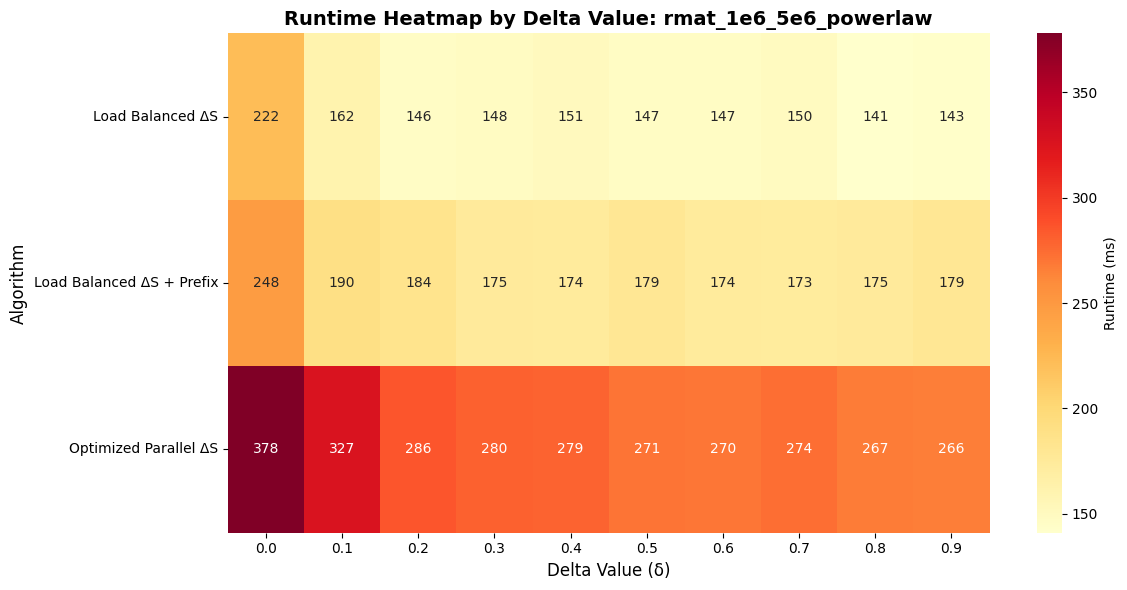

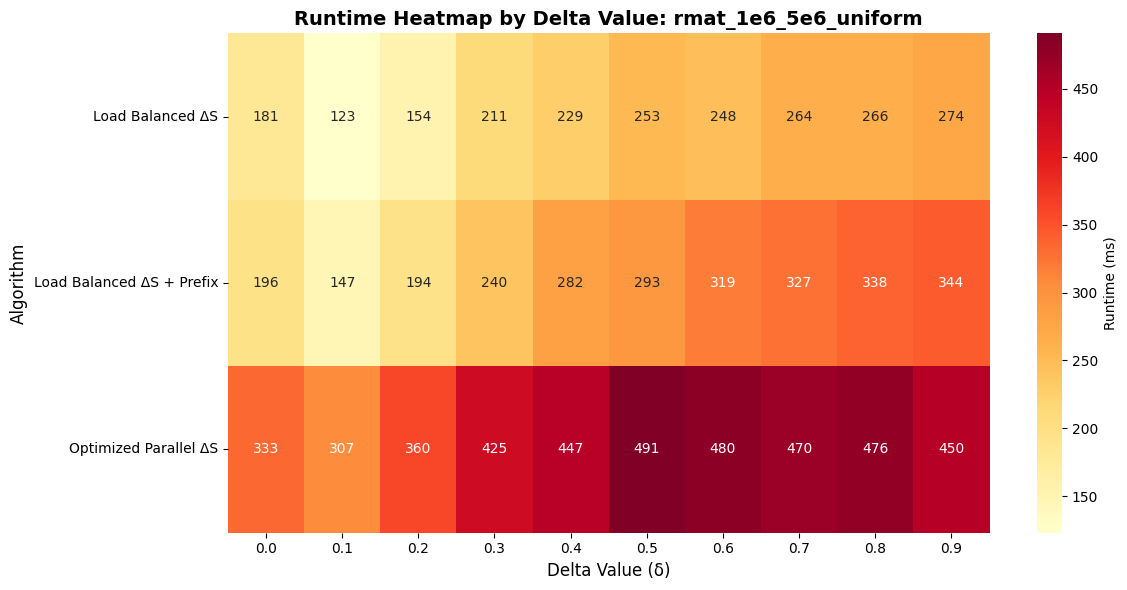

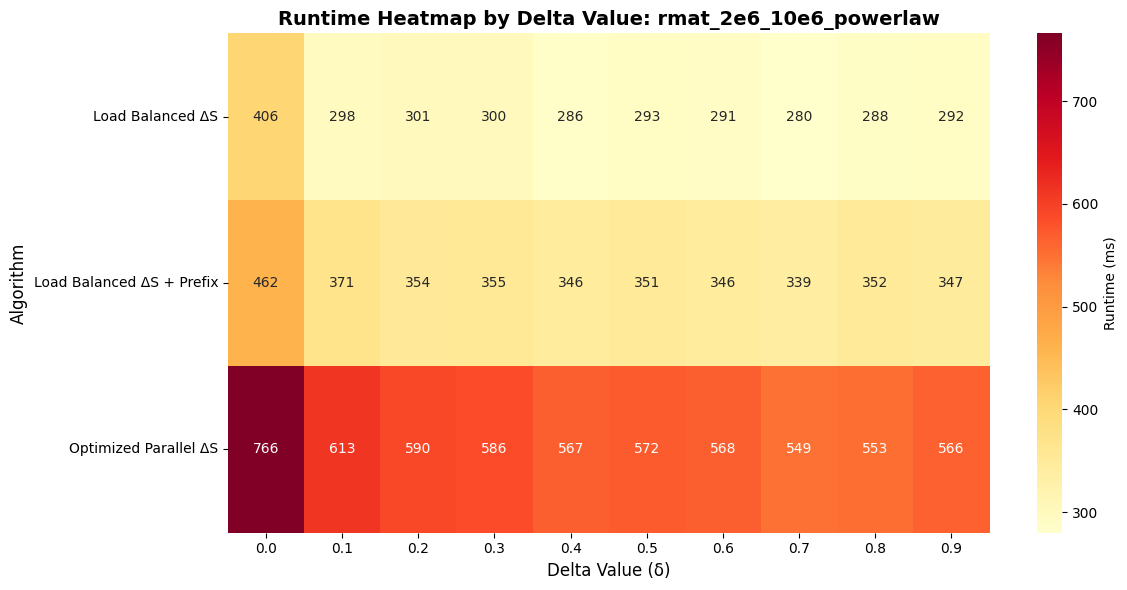

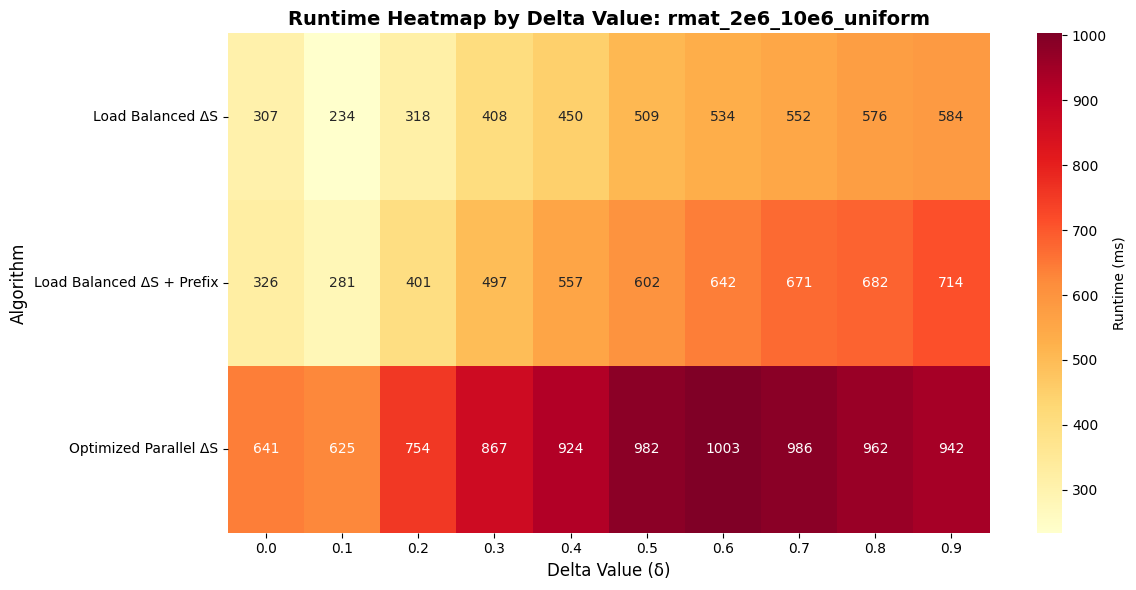

In [28]:
# Create a heatmap showing delta value performance for each algorithm
for graph in graphs:
    graph_data = delta_analysis[delta_analysis['Graph_Name'] == graph]
    
    # Create pivot table for heatmap
    heatmap_data = graph_data.pivot(index='Algorithm_Short', columns='Delta', values='Min_Time_ms')
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', 
                cbar_kws={'label': 'Runtime (ms)'})
    plt.title(f'Runtime Heatmap by Delta Value: {graph}', fontsize=14, fontweight='bold')
    plt.xlabel('Delta Value (δ)', fontsize=12)
    plt.ylabel('Algorithm', fontsize=12)
    plt.tight_layout()
    plt.show()


In [29]:
## 4. Summary Statistics and Best Configurations


In [30]:
# Find best configuration for each algorithm on each graph
best_configs = []

for graph in df['Graph_Name'].unique():
    for algorithm in df['Algorithm_Short'].unique():
        alg_data = df[(df['Graph_Name'] == graph) & (df['Algorithm_Short'] == algorithm)]
        
        if not alg_data.empty:
            best_run = alg_data.loc[alg_data['Min_Time_ms'].idxmin()]
            best_configs.append({
                'Graph': graph,
                'Algorithm': algorithm,
                'Best_Runtime_ms': best_run['Min_Time_ms'],
                'Best_Threads': best_run['Threads'],
                'Best_Delta': best_run['Delta'],
                'Speedup_vs_Avg': best_run['Speedup'],
                'Efficiency': best_run['Efficiency']
            })

best_configs_df = pd.DataFrame(best_configs)

print("Best configuration for each algorithm on each graph:")
print(best_configs_df.round(3))


Best configuration for each algorithm on each graph:
                     Graph                  Algorithm  Best_Runtime_ms  \
0     lrd_1e6_1e8_powerlaw                   Dijkstra             1353   
1     lrd_1e6_1e8_powerlaw      Optimized Parallel ΔS              920   
2     lrd_1e6_1e8_powerlaw           Load Balanced ΔS              402   
3     lrd_1e6_1e8_powerlaw  Load Balanced ΔS + Prefix              458   
4      lrd_1e6_1e8_uniform                   Dijkstra             1618   
5      lrd_1e6_1e8_uniform      Optimized Parallel ΔS             1053   
6      lrd_1e6_1e8_uniform           Load Balanced ΔS              362   
7      lrd_1e6_1e8_uniform  Load Balanced ΔS + Prefix              400   
8     lrs_2e6_6e6_powerlaw                   Dijkstra              997   
9     lrs_2e6_6e6_powerlaw      Optimized Parallel ΔS             1005   
10    lrs_2e6_6e6_powerlaw           Load Balanced ΔS              974   
11    lrs_2e6_6e6_powerlaw  Load Balanced ΔS + Prefix      

In [31]:
# Overall performance summary
print("\n" + "="*60)
print("PERFORMANCE SUMMARY")
print("="*60)

for graph in graphs:
    print(f"\n📊 Graph: {graph}")
    print("-" * 40)
    
    graph_best = best_configs_df[best_configs_df['Graph'] == graph]
    fastest_overall = graph_best.loc[graph_best['Best_Runtime_ms'].idxmin()]
    
    print(f"🏆 Fastest Algorithm: {fastest_overall['Algorithm']}")
    print(f"   Runtime: {fastest_overall['Best_Runtime_ms']:.0f} ms")
    print(f"   Configuration: {fastest_overall['Best_Threads']} threads, δ={fastest_overall['Best_Delta']}")
    
    # Best performing parallel algorithms (excluding Dijkstra)
    parallel_best = graph_best[graph_best['Algorithm'] != 'Dijkstra']
    if not parallel_best.empty:
        fastest_parallel = parallel_best.loc[parallel_best['Best_Runtime_ms'].idxmin()]
        print(f"\n🚀 Best Parallel Algorithm: {fastest_parallel['Algorithm']}")
        print(f"   Runtime: {fastest_parallel['Best_Runtime_ms']:.0f} ms")
        print(f"   Configuration: {fastest_parallel['Best_Threads']} threads, δ={fastest_parallel['Best_Delta']}")
        
        # Calculate speedup vs Dijkstra
        dijkstra_time = graph_best[graph_best['Algorithm'] == 'Dijkstra']['Best_Runtime_ms'].iloc[0]
        speedup = dijkstra_time / fastest_parallel['Best_Runtime_ms']
        print(f"   Speedup vs Dijkstra: {speedup:.2f}x")

print("\n" + "="*60)



PERFORMANCE SUMMARY

📊 Graph: lrd_1e6_1e8_powerlaw
----------------------------------------
🏆 Fastest Algorithm: Load Balanced ΔS
   Runtime: 402 ms
   Configuration: 16 threads, δ=0.4

🚀 Best Parallel Algorithm: Load Balanced ΔS
   Runtime: 402 ms
   Configuration: 16 threads, δ=0.4
   Speedup vs Dijkstra: 3.37x

📊 Graph: lrd_1e6_1e8_uniform
----------------------------------------
🏆 Fastest Algorithm: Load Balanced ΔS
   Runtime: 362 ms
   Configuration: 16 threads, δ=0.1

🚀 Best Parallel Algorithm: Load Balanced ΔS
   Runtime: 362 ms
   Configuration: 16 threads, δ=0.1
   Speedup vs Dijkstra: 4.47x

📊 Graph: lrs_2e6_6e6_powerlaw
----------------------------------------
🏆 Fastest Algorithm: Load Balanced ΔS
   Runtime: 974 ms
   Configuration: 16 threads, δ=0.8

🚀 Best Parallel Algorithm: Load Balanced ΔS
   Runtime: 974 ms
   Configuration: 16 threads, δ=0.8
   Speedup vs Dijkstra: 1.02x

📊 Graph: lrs_2e6_6e6_uniform
----------------------------------------
🏆 Fastest Algorithm: Loa